This script will run the ak and canada models together

Read in packages

In [1]:
import pandas as pd
import logging, os
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
import tensorflow
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.python.lib.io import file_io
from tensorflow.python.keras.optimizer_v2.adam import Adam
import os
import segmentation_models as sm
import matplotlib.pyplot as plt
import numpy as np
#from tensorflow.python.keras.utils.multi_gpu_utils import multi_gpu_model
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Dropout,Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.layers import concatenate, Conv2DTranspose, Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, Input, AvgPool2D
from tensorflow.keras.models import Model
from keras_unet_collection import models
import tensorflow_addons as tfa
import logging
# from tensorflow import tensorflow.keras.mixed_precision.set_global_policy("mixed_float16")

Segmentation Models: using `keras` framework.


/home/spotter5/.local/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Function to read in the validation and testing data for all four scenarios, landsat only no threshold, landsat threshold,


In [2]:
#read in the trainiing and testing files and get lissts
# #-----landsat 8 128
# land_128_val = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_128_validation_files.csv')['Files'].tolist()
# land_128_test = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_128_testing_files.csv')['Files'].tolist()
# land_128_0_val = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_0_128_validation_files.csv')['Files'].tolist()
# land_128_0_test = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_0_128_testing_files.csv')['Files'].tolist()
# land_128_079_val = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_079_128_validation_files.csv')['Files'].tolist()
# land_128_079_test = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_079_128_testing_files.csv')['Files'].tolist()


# # #----------landsat 8 256
# land_256_val = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_256_validation_files.csv')['Files'].tolist()
# land_256_test = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_256_testing_files.csv')['Files'].tolist()
# land_256_0_val = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_0_256_validation_files.csv')['Files'].tolist()
# land_256_0_test = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_0_256_testing_files.csv')['Files'].tolist()
# land_256_079_val = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_079_256_validation_files.csv')['Files'].tolist()
# land_256_079_test = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_079_256_testing_files.csv')['Files'].tolist()


# # #-----------landsat 8 512
# land_512_val = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_512_validation_files.csv')['Files'].tolist()
# land_512_test = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_512_testing_files.csv')['Files'].tolist()
# land_512_0_val = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_0_512_validation_files.csv')['Files'].tolist()
# land_512_0_test = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_0_512_testing_files.csv')['Files'].tolist()
# land_512_079_val = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_079_512_validation_files.csv')['Files'].tolist()
# land_512_079_test = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_079_512_testing_files.csv')['Files'].tolist()


# #------------landsat sentinel
# #-----landsat 8 128
# land_sent_128_val = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_128_validation_files.csv')['Files'].tolist()
# land_sent_128_test = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_128_testing_files.csv')['Files'].tolist()
# land_sent_128_0_val = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_0_128_validation_files.csv')['Files'].tolist()
# land_sent_128_0_test = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_0_128_testing_files.csv')['Files'].tolist()
# land_sent_128_079_val = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_079_128_validation_files.csv')['Files'].tolist()
# land_sent_128_079_test = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_079_128_testing_files.csv')['Files'].tolist()


#----------landsat 8 256
land_sent_256_val = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_256_validation_files.csv')['Files'].tolist()
land_sent_256_test = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_256_testing_files.csv')['Files'].tolist()
land_sent_256_0_val = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_0_256_validation_files.csv')['Files'].tolist()
land_sent_256_0_test = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_0_256_testing_files.csv')['Files'].tolist()
land_sent_256_079_val = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_079_256_validation_files.csv')['Files'].tolist()
land_sent_256_079_test = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_079_256_testing_files.csv')['Files'].tolist()

land_sent_512_0_val = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_0_512_validation_files.csv')['Files'].tolist()
land_sent_512_0_test = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_0_512_testing_files.csv')['Files'].tolist()

#------------just landsat
land_sent_128_val = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/just_land_collection2_128_validation_files.csv')['Files'].tolist()
land_sent_128_test = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/just_land_collection2_128_testing_files.csv')['Files'].tolist()
land_sent_128_0_val = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/just_land_collection2_0_128_validation_files.csv')['Files'].tolist()
land_sent_128_0_test = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/just_land_collection2_0_128_testing_files.csv')['Files'].tolist()
land_sent_128_079_val = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/just_land_collection2_079_128_validation_files.csv')['Files'].tolist()
land_sent_128_079_test = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/just_land_collection2_079_128_testing_files.csv')['Files'].tolist()



#----------no landsat 7 
land_sent_no_7_128_val = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/nbac_land_no7_collection2_128_validation_files.csv')['Files'].tolist()
land_sent_no_7_128_test = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/nbac_land_no7_collection2_128_testing_files.csv')['Files'].tolist()
land_sent_no_7_128_0_val = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/nbac_land_no7_0_collection2_128_validation_files.csv')['Files'].tolist()
land_sent_no_7_128_0_test = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/nbac_land_no7_0_collection2_128_testing_files.csv')['Files'].tolist()
land_sent_no_7_128_079_val = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/just_land_collection2_079_128_validation_files.csv')['Files'].tolist()
land_sent_no_7_128_079_test = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/just_land_collection2_079_128_testing_files.csv')['Files'].tolist()



# #------------all ak ca
ak_ca_128_0_val = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/ak_ca_c2_0_validation_files.csv')['Files'].tolist()
ak_ca_128_0_test = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/ak_ca_c2_0_testing_files.csv')['Files'].tolist()




# # #alfdb
# alfdb = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/alfdb_1985_sent_files.csv')['Files'].tolist()
# alfdb_thres_0 = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/alfdb_1985_0_sent_files.csv')['Files'].tolist()
# alfdb_thres_084 = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/alfdb_1985_084_sent_files.csv')['Files'].tolist()


# #mtbs
mtbs = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/mtbs_1985_c2_128_files.csv')['Files'].tolist()
mtbs_0 = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/mtbs_1985_c2_0_128_files.csv')['Files'].tolist()
mtbs_079 = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/mtbs_1985_c2_079_128_files.csv')['Files'].tolist()




#function to get files from storage bucket
def get_files(bucket_path):

  """argument is the path to where the numpy
  save files are located, return a list of filenames
  """
  all = []

  #list of files
  files = os.listdir(bucket_path)

  #get list of filenames we will use, notte I remove images that don't have a target due to clouds
  file_names = []
  for f in files:
    if f.endswith('.npy'):


      all.append(os.path.join(bucket_path, f))
  return(all)
  

#landsat
land_128_testing_data_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_validation_data_128')
land_128_0_testing_data_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_0_validation_data_128')
land_128_079_testing_data_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_079_validation_data_128')


land_128_testing_label_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_validation_labels_128')
land_128_0_testing_label_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_0_validation_labels_128')
land_128_079_testing_label_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_079_validation_labels_128')


land_256_testing_data_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_validation_data_256')
land_256_0_testing_data_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_0_validation_data_256')
land_256_079_testing_data_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_079_validation_data_256')

land_256_testing_label_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_validation_labels_256')
land_256_0_testing_label_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_0_validation_labels_256')
land_256_079_testing_label_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_079_validation_labels_256')


land_512_testing_data_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_validation_data_512')
land_512_0_testing_data_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_0_validation_data_512')
land_512_079_testing_data_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_079_validation_data_512')

land_512_testing_label_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_validation_labels_512')
land_512_0_testing_label_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_0_validation_labels_512')
land_512_079_testing_label_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_079_validation_labels_512')



# #------landsat sentinel
# #landsat
land_sent_128_testing_data_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_validation_data_128')
land_sent_128_0_testing_data_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_0_validation_data_128')
land_sent_128_079_testing_data_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_079_validation_data_128')


land_sent_128_testing_label_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_validation_labels_128')
land_sent_128_0_testing_label_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_0_validation_labels_128')
land_sent_128_079_testing_label_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_079_validation_labels_128')

land_sent_512_0_testing_data_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_0_validation_data_512')
land_sent_512_0_testing_label_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_0_validation_labels_512')

#direction
land_sent_128_0_testing_data_names_direction = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_0_validation_data_128_direction')
land_sent_128_0_testing_label_names_direction = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_0_validation_labels_128')


land_sent_256_testing_data_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_validation_data_256')
land_sent_256_0_testing_data_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_0_validation_data_256')
land_sent_256_079_testing_data_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_079_validation_data_256')

land_sent_256_testing_label_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_validation_labels_256')
land_sent_256_0_testing_label_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_0_validation_labels_256')
land_sent_256_079_testing_label_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_079_validation_labels_256')

#----------just landsat
just_land_128_testing_data_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/just_land_collection2_validation_data_128')
just_land_128_0_testing_data_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/just_land_collection2_0_validation_data_128')
just_land_128_079_testing_data_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/just_land_collection2_079_validation_data_128')


just_land_128_testing_label_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/just_land_collection2_validation_labels_128')
just_land_128_0_testing_label_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/just_land_collection2_0_validation_labels_128')
just_land_128_079_testing_label_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/just_land_collection2_079_validation_labels_128')

#----------no 7
land_sent_no_7_128_testing_data_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/nbac_land_no7_collection2_validation_data_128')
land_sent_no_7_128_0_testing_data_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/nbac_land_no7_0_collection2_validation_data_128')
land_sent_no_7_128_079_testing_data_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/just_land_collection2_079_validation_data_128')


land_sent_no_7_128_testing_label_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/nbac_land_no7_collection2_validation_labels_128')
land_sent_no_7_128_0_testing_label_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/nbac_land_no7_0_collection2_validation_labels_128')
land_sent_no_7_128_079_testing_label_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training//nbac_land_no7_079_collection2_validation_labels_128')


# #all ak ca
ak_ca_128_0_testing_data_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/ak_ca_c2_0_validation_data')
ak_ca_128_0_testing_label_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/ak_ca_c2_0_validation_labels')

#global norm
ak_ca_128_global_norm_0_testing_data_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/ak_ca_c2_0_validation_data')
ak_ca_128_0_global_norm_testing_label_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/ak_ca_c2_0_validation_labels')



# #lfdb
# alfdb_testing_data_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/alfdb_1985_sent_data')
# alfdb_thres_0_testing_data_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/alfdb_1985_0_sent_data')
# alfdb_thres_084_testing_data_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/alfdb_1985_084_sent_data')

# alfdb_testing_label_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/alfdb_1985_sent_labels')
# alfdb_thres_0_testing_label_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/alfdb_1985_0_sent_labels')
# alfdb_thres_084_testing_label_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/alfdb_1985_084_sent_data')

# #mtbs
mtbs_testing_data_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/mtbs_1985_c2_128_data')
mtbs_0_testing_data_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/mtbs_1985_c2_0_128_data')
mtbs_079_testing_data_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/mtbs_1985_c2_079_128_data')

mtbs_testing_label_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/mtbs_1985_c2_128_labels')
mtbs_0_testing_label_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/mtbs_1985_c2_0_128_labels')
mtbs_079_testing_label_names = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/mtbs_1985_c2_079_128_labels')

mtbs_0_testing_data_names_direction = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/mtbs_1985_c2_0_128_data_direction')
mtbs_0_testing_label_names_direction = get_files('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/mtbs_1985_c2_0_128_labels')







Set up image generato

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

class img_gen(tensorflow.keras.utils.Sequence):

    """Helper to iterate over the data (as Numpy arrays).
    Inputs are batch size, the image size, the input paths (x) and target paths (y)
    """

    #will need pre defined variables batch_size, img_size, input_img_paths and target_img_paths
    def __init__(self, batch_size, img_size, input_img_paths, target_img_paths):
        self.batch_size = batch_size
        self.img_size = img_size
        self.input_img_paths = input_img_paths
        self.target_img_paths = target_img_paths

    #number of batches the generator is supposed to produceis the length of the paths divided by the batch siize
    def __len__(self):
        return len(self.target_img_paths) // self.batch_size

    def __getitem__(self, idx):
        """Returns tuple (input, target) correspond to batch #idx."""
        i = idx * self.batch_size
        batch_input_img_paths = self.input_img_paths[i : i + self.batch_size] #for a given index get the input batch pathways (x)
        batch_target_img_paths = self.target_img_paths[i : i + self.batch_size] #for a given index get the input batch pathways (y)
        x = np.zeros((self.batch_size,) + self.img_size + (9,), dtype="float32") #create matrix of zeros which will have the dimension (batch_size, height, wideth, n_bands), 8 is the n_bands
        
        #start populating x by enumerating over the input img paths
        for j, path in enumerate(batch_input_img_paths):
      
            #load image
            img =  np.round(np.load(path), 3)
           
            # img = img * 1000
            img = img.astype(float)
            img = np.round(img, 3)
            img[img == 0] = -999

            img[np.isnan(img)] = -999
            

            img[img == -999] = np.nan

            in_shape = img.shape

            #turn to dataframe to normalize
            img = img.reshape(img.shape[0] * img.shape[1], img.shape[2])

            #normalize 0 to 1
            img = scaler.fit_transform(img)
#             img = pd.DataFrame(img)
#             img.columns = ['B1', 'B2', 'B3', 'B4', 'B5', 'B7', 'dNBR', 'NDVI', 'y']
#             start = -0.5
#             end = 0.5
#             width = end - start
#             img = img.apply(lambda x: (x - np.nanmin(x))/(np.nanmax(x)- np.nanmin(x)) * width + start, axis=0)


        
            #convert back to iriginall shape
#             img = img.values.reshape(in_shape)
            img = img.reshape(in_shape)

            
            
#             min_n = np.nanmin(img)
#             replace nan with -1
            # img = img / 1000
            img[np.isnan(img)] = -1

            #apply standardization
            # img = normalize(img, axis=(0,1))
          
            img = np.round(img, 3)
            #populate x
            x[j] = img#[:, :, 4:] index number is not included, 
            
        #do tthe same thing for y
        y = np.zeros((self.batch_size,) + self.img_size + (1,), dtype="uint8")
            
        #do tthe same thing for y
        y = np.zeros((self.batch_size,) + self.img_size + (1,), dtype="uint8")
        
        for j, path in enumerate(batch_target_img_paths):
                                   
            #load image
            img =  np.round(np.load(path), 3)
               
            img = img.astype(int)

            img[img < 0] = 0
            img[img >1] = 0
            img[~np.isin(img, [0,1])] = 0
          
            img[np.isnan(img)] = 0
            img = img.astype(int)
           
            # img =  tf.keras.utils.to_categorical(img, num_classes = 2)
            y[j] = np.expand_dims(img, 2) 
         

            #Ground truth labels are 1, 2, 3. Subtract one to make them 0, 1, 2:
            # y[j] -= 1

        return x, y

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

class img_gen_3(tensorflow.keras.utils.Sequence):

    """Helper to iterate over the data (as Numpy arrays).
    Inputs are batch size, the image size, the input paths (x) and target paths (y)
    """

    #will need pre defined variables batch_size, img_size, input_img_paths and target_img_paths
    def __init__(self, batch_size, img_size, input_img_paths, target_img_paths):
        self.batch_size = batch_size
        self.img_size = img_size
        self.input_img_paths = input_img_paths
        self.target_img_paths = target_img_paths

    #number of batches the generator is supposed to produceis the length of the paths divided by the batch siize
    def __len__(self):
        return len(self.target_img_paths) // self.batch_size

    def __getitem__(self, idx):
        """Returns tuple (input, target) correspond to batch #idx."""
        i = idx * self.batch_size
        batch_input_img_paths = self.input_img_paths[i : i + self.batch_size] #for a given index get the input batch pathways (x)
        batch_target_img_paths = self.target_img_paths[i : i + self.batch_size] #for a given index get the input batch pathways (y)
        x = np.zeros((self.batch_size,) + self.img_size + (3,), dtype="float32") #create matrix of zeros which will have the dimension (batch_size, height, wideth, n_bands), 8 is the n_bands
        
        #start populating x by enumerating over the input img paths
        for j, path in enumerate(batch_input_img_paths):
      
            #load image
            img =  np.round(np.load(path), 3)[:, :, 6:]
           
            # img = img * 1000
            img = img.astype(float)
            img = np.round(img, 3)
            img[img == 0] = -999

            img[np.isnan(img)] = -999
            

            img[img == -999] = np.nan

            in_shape = img.shape

            #turn to dataframe to normalize
            img = img.reshape(img.shape[0] * img.shape[1], img.shape[2])

            #normalize 0 to 1
            img = scaler.fit_transform(img)
#             img = pd.DataFrame(img)
#             img.columns = ['B1', 'B2', 'B3', 'B4', 'B5', 'B7', 'dNBR', 'NDVI', 'y']
#             start = -0.5
#             end = 0.5
#             width = end - start
#             img = img.apply(lambda x: (x - np.nanmin(x))/(np.nanmax(x)- np.nanmin(x)) * width + start, axis=0)


        
            #convert back to iriginall shape
#             img = img.values.reshape(in_shape)
            img = img.reshape(in_shape)

            
            
#             min_n = np.nanmin(img)
#             replace nan with -1
            # img = img / 1000
            img[np.isnan(img)] = -1

            #apply standardization
            # img = normalize(img, axis=(0,1))
          
            img = np.round(img, 3)
            #populate x
            x[j] = img#[:, :, 4:] index number is not included, 
            
        #do tthe same thing for y
        y = np.zeros((self.batch_size,) + self.img_size + (1,), dtype="uint8")
            
        #do tthe same thing for y
        y = np.zeros((self.batch_size,) + self.img_size + (1,), dtype="uint8")
        
        for j, path in enumerate(batch_target_img_paths):
                                   
            #load image
            img =  np.round(np.load(path), 3)
               
            img = img.astype(int)

            img[img < 0] = 0
            img[img >1] = 0
            img[~np.isin(img, [0,1])] = 0
          
            img[np.isnan(img)] = 0
            img = img.astype(int)
           
            # img =  tf.keras.utils.to_categorical(img, num_classes = 2)
            y[j] = np.expand_dims(img, 2) 
         

            #Ground truth labels are 1, 2, 3. Subtract one to make them 0, 1, 2:
            # y[j] -= 1

        return x, y

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

class img_gen_3_direction(tensorflow.keras.utils.Sequence):

    """Helper to iterate over the data (as Numpy arrays).
    Inputs are batch size, the image size, the input paths (x) and target paths (y)
    """

    #will need pre defined variables batch_size, img_size, input_img_paths and target_img_paths
    def __init__(self, batch_size, img_size, input_img_paths, target_img_paths):
        self.batch_size = batch_size
        self.img_size = img_size
        self.input_img_paths = input_img_paths
        self.target_img_paths = target_img_paths

    #number of batches the generator is supposed to produceis the length of the paths divided by the batch siize
    def __len__(self):
        return len(self.target_img_paths) // self.batch_size

    def __getitem__(self, idx):
        """Returns tuple (input, target) correspond to batch #idx."""
        i = idx * self.batch_size
        batch_input_img_paths = self.input_img_paths[i : i + self.batch_size] #for a given index get the input batch pathways (x)
        batch_target_img_paths = self.target_img_paths[i : i + self.batch_size] #for a given index get the input batch pathways (y)
        x = np.zeros((self.batch_size,) + self.img_size + (3,), dtype="float32") #create matrix of zeros which will have the dimension (batch_size, height, wideth, n_bands), 8 is the n_bands
        
        #start populating x by enumerating over the input img paths
        for j, path in enumerate(batch_input_img_paths):
      
            #load image
            img =  np.round(np.load(path), 3)[:, :, 6:]
           
            # img = img * 1000
            img = img.astype(float)
            img = np.round(img, 3)
            
            #populate x
            x[j] = img#[:, :, 4:] index number is not included, 
            
        #do tthe same thing for y
        y = np.zeros((self.batch_size,) + self.img_size + (1,), dtype="uint8")
            
        #do tthe same thing for y
        y = np.zeros((self.batch_size,) + self.img_size + (1,), dtype="uint8")
        
        for j, path in enumerate(batch_target_img_paths):
                                   
            #load image
            img =  np.round(np.load(path), 3)
               
            img = img.astype(int)

            img[img < 0] = 0
            img[img >1] = 0
            img[~np.isin(img, [0,1])] = 0
          
            img[np.isnan(img)] = 0
            img = img.astype(int)
           
            # img =  tf.keras.utils.to_categorical(img, num_classes = 2)
            y[j] = np.expand_dims(img, 2) 
         

            #Ground truth labels are 1, 2, 3. Subtract one to make them 0, 1, 2:
            # y[j] -= 1

        return x, y

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

class img_gen_6(tensorflow.keras.utils.Sequence):

    """Helper to iterate over the data (as Numpy arrays).
    Inputs are batch size, the image size, the input paths (x) and target paths (y)
    """

    #will need pre defined variables batch_size, img_size, input_img_paths and target_img_paths
    def __init__(self, batch_size, img_size, input_img_paths, target_img_paths):
        self.batch_size = batch_size
        self.img_size = img_size
        self.input_img_paths = input_img_paths
        self.target_img_paths = target_img_paths

    #number of batches the generator is supposed to produceis the length of the paths divided by the batch siize
    def __len__(self):
        return len(self.target_img_paths) // self.batch_size

    def __getitem__(self, idx):
        """Returns tuple (input, target) correspond to batch #idx."""
        i = idx * self.batch_size
        batch_input_img_paths = self.input_img_paths[i : i + self.batch_size] #for a given index get the input batch pathways (x)
        batch_target_img_paths = self.target_img_paths[i : i + self.batch_size] #for a given index get the input batch pathways (y)
        x = np.zeros((self.batch_size,) + self.img_size + (6,), dtype="float32") #create matrix of zeros which will have the dimension (batch_size, height, wideth, n_bands), 8 is the n_bands
        
        #start populating x by enumerating over the input img paths
        for j, path in enumerate(batch_input_img_paths):
      
            #load image
            img =  np.round(np.load(path), 3)[:, :, :6]
           
            # img = img * 1000
            img = img.astype(float)
            img = np.round(img, 3)
            img[img == 0] = -999

            img[np.isnan(img)] = -999
            

            img[img == -999] = np.nan

            in_shape = img.shape

            #turn to dataframe to normalize
            img = img.reshape(img.shape[0] * img.shape[1], img.shape[2])

            #normalize 0 to 1
            img = scaler.fit_transform(img)
#             img = pd.DataFrame(img)
#             img.columns = ['B1', 'B2', 'B3', 'B4', 'B5', 'B7', 'dNBR', 'NDVI', 'y']
#             start = -0.5
#             end = 0.5
#             width = end - start
#             img = img.apply(lambda x: (x - np.nanmin(x))/(np.nanmax(x)- np.nanmin(x)) * width + start, axis=0)


        
            #convert back to iriginall shape
#             img = img.values.reshape(in_shape)
            img = img.reshape(in_shape)

            
            
#             min_n = np.nanmin(img)
#             replace nan with -1
            # img = img / 1000
            img[np.isnan(img)] = -1

            #apply standardization
            # img = normalize(img, axis=(0,1))
          
            img = np.round(img, 3)
            #populate x
            x[j] = img#[:, :, 4:] index number is not included, 
            
        #do tthe same thing for y
        y = np.zeros((self.batch_size,) + self.img_size + (1,), dtype="uint8")
            
        #do tthe same thing for y
        y = np.zeros((self.batch_size,) + self.img_size + (1,), dtype="uint8")
        
        for j, path in enumerate(batch_target_img_paths):
                                   
            #load image
            img =  np.round(np.load(path), 3)
               
            img = img.astype(int)

            img[img < 0] = 0
            img[img >1] = 0
            img[~np.isin(img, [0,1])] = 0
          
            img[np.isnan(img)] = 0
            img = img.astype(int)
           
            # img =  tf.keras.utils.to_categorical(img, num_classes = 2)
            y[j] = np.expand_dims(img, 2) 
         

            #Ground truth labels are 1, 2, 3. Subtract one to make them 0, 1, 2:
            # y[j] -= 1

        return x, y

In [7]:
from sklearn.preprocessing import StandardScaler

# scaler = MinMaxScaler()
# from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

class img_gen_3_standard(tensorflow.keras.utils.Sequence):

    """Helper to iterate over the data (as Numpy arrays).
    Inputs are batch size, the image size, the input paths (x) and target paths (y)
    """

    #will need pre defined variables batch_size, img_size, input_img_paths and target_img_paths
    def __init__(self, batch_size, img_size, input_img_paths, target_img_paths):
        self.batch_size = batch_size
        self.img_size = img_size
        self.input_img_paths = input_img_paths
        self.target_img_paths = target_img_paths

    #number of batches the generator is supposed to produceis the length of the paths divided by the batch siize
    def __len__(self):
        return len(self.target_img_paths) // self.batch_size

    def __getitem__(self, idx):
        """Returns tuple (input, target) correspond to batch #idx."""
        i = idx * self.batch_size
        batch_input_img_paths = self.input_img_paths[i : i + self.batch_size] #for a given index get the input batch pathways (x)
        batch_target_img_paths = self.target_img_paths[i : i + self.batch_size] #for a given index get the input batch pathways (y)
        x = np.zeros((self.batch_size,) + self.img_size + (3,), dtype="float32") #create matrix of zeros which will have the dimension (batch_size, height, wideth, n_bands), 8 is the n_bands
        
        #start populating x by enumerating over the input img paths
        for j, path in enumerate(batch_input_img_paths):
      
            #load image
            img =  np.round(np.load(path), 3)[:, :, 6:]
           
            # img = img * 1000
            img = img.astype(float)
            img = np.round(img, 3)
            img[img == 0] = -999

            img[np.isnan(img)] = -999
            

            img[img == -999] = np.nan

            in_shape = img.shape

            #turn to dataframe to normalize
            img = img.reshape(img.shape[0] * img.shape[1], img.shape[2])

            #normalize 0 to 1
            img = scaler.fit_transform(img)
#             img = pd.DataFrame(img)
#             img.columns = ['B1', 'B2', 'B3', 'B4', 'B5', 'B7', 'dNBR', 'NDVI', 'y']
#             start = -0.5
#             end = 0.5
#             width = end - start
#             img = img.apply(lambda x: (x - np.nanmin(x))/(np.nanmax(x)- np.nanmin(x)) * width + start, axis=0)


        
            #convert back to iriginall shape
#             img = img.values.reshape(in_shape)
            img = img.reshape(in_shape)

            
            
#             min_n = np.nanmin(img)
#             replace nan with -1
            # img = img / 1000
            img[np.isnan(img)] = -1

            #apply standardization
            # img = normalize(img, axis=(0,1))
          
            img = np.round(img, 3)
            #populate x
            x[j] = img#[:, :, 4:] index number is not included, 
            
        #do tthe same thing for y
        y = np.zeros((self.batch_size,) + self.img_size + (1,), dtype="uint8")
            
        #do tthe same thing for y
        y = np.zeros((self.batch_size,) + self.img_size + (1,), dtype="uint8")
        
        for j, path in enumerate(batch_target_img_paths):
                                   
            #load image
            img =  np.round(np.load(path), 3)
               
            img = img.astype(int)

            img[img < 0] = 0
            img[img >1] = 0
            img[~np.isin(img, [0,1])] = 0
          
            img[np.isnan(img)] = 0
            img = img.astype(int)
           
            # img =  tf.keras.utils.to_categorical(img, num_classes = 2)
            y[j] = np.expand_dims(img, 2) 
         

            #Ground truth labels are 1, 2, 3. Subtract one to make them 0, 1, 2:
            # y[j] -= 1

        return x, y

In [ ]:
mean_std = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_0_global_stand.csv")

class img_gen_stand_glob(tensorflow.keras.utils.Sequence):

    """Helper to iterate over the data (as Numpy arrays).
    Inputs are batch size, the image size, the input paths (x) and target paths (y)
    """

    #will need pre defined variables batch_size, img_size, input_img_paths and target_img_paths
    def __init__(self, batch_size, img_size, input_img_paths, target_img_paths):
	    self.batch_size = batch_size
	    self.img_size = img_size
	    self.input_img_paths = input_img_paths
	    self.target_img_paths = target_img_paths

    #number of batches the generator is supposed to produceis the length of the paths divided by the batch siize
    def __len__(self):
	    return len(self.target_img_paths) // self.batch_size

    def __getitem__(self, idx):
        """Returns tuple (input, target) correspond to batch #idx."""
        i = idx * self.batch_size
        batch_input_img_paths = self.input_img_paths[i : i + self.batch_size] #for a given index get the input batch pathways (x)
        batch_target_img_paths = self.target_img_paths[i : i + self.batch_size] #for a given index get the input batch pathways (y)
		
        x = np.zeros((self.batch_size,) + self.img_size + (3,), dtype="float32") #create matrix of zeros which will have the dimension (batch_size, height, wideth, n_bands), 8 is the n_bands
        
        #start populating x by enumerating over the input img paths
        for j, path in enumerate(batch_input_img_paths):

            #load image
            img =  np.round(np.load(path), 3)#[:, :, 6:]
			
			
			#what I will reshape to
            img2 =  np.round(np.load(path), 3)[:, :, 6:]

            # img = img * 1000
            img = img.astype(float)
            img = np.round(img, 3)
            img[img == 0] = -999

            img[np.isnan(img)] = -999


            img[img == -999] = np.nan

            in_shape = img2.shape
            
            #turn to dataframe to normalize
            img = img.reshape(img.shape[0] * img.shape[1], img.shape[2])
			
            img = pd.DataFrame(img)
			
			#make sure the band mean and std match the full training set
            img = transform_mean_std(train_data = mean_std, new_data = img, cols = [6,7,8])
			
			#apply standard scaler
            img = scaler.fit_transform(img.values)

            img = img.reshape(in_shape)

#             replace nan with -1
            img[np.isnan(img)] = -1

#apply standardization
# img = normalize(img, axis=(0,1))

            img = np.round(img, 3)
            #populate x
            x[j] = img#[:, :, 4:] index number is not included, 


        #do tthe same thing for y
        y = np.zeros((self.batch_size,) + self.img_size + (1,), dtype="uint8")

        for j, path in enumerate(batch_target_img_paths):

            #load image
            img =  np.round(np.load(path), 3)

            img = img.astype(int)

            img[img < 0] = 0
            img[img >1] = 0
            img[~np.isin(img, [0,1])] = 0

            img[np.isnan(img)] = 0
            img = img.astype(int)

            # img =  tf.keras.utils.to_categorical(img, num_classes = 2)
            y[j] = np.expand_dims(img, 2) 
  

    #Ground truth labels are 1, 2, 3. Subtract one to make them 0, 1, 2:
    # y[j] -= 1

        return x, y


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
min_max = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_0_global_min_max_cutoff.csv").reset_index(drop = True)
min_max = min_max[['6', '7', '8']]

class img_gen_3_cutoff(tensorflow.keras.utils.Sequence):

    """Helper to iterate over the data (as Numpy arrays).
    Inputs are batch size, the image size, the input paths (x) and target paths (y)
    """

    #will need pre defined variables batch_size, img_size, input_img_paths and target_img_paths
    def __init__(self, batch_size, img_size, input_img_paths, target_img_paths):
        self.batch_size = batch_size
        self.img_size = img_size
        self.input_img_paths = input_img_paths
        self.target_img_paths = target_img_paths

    #number of batches the generator is supposed to produceis the length of the paths divided by the batch siize
    def __len__(self):
        return len(self.target_img_paths) // self.batch_size

    def __getitem__(self, idx):
        """Returns tuple (input, target) correspond to batch #idx."""
        i = idx * self.batch_size
        batch_input_img_paths = self.input_img_paths[i : i + self.batch_size] #for a given index get the input batch pathways (x)
        batch_target_img_paths = self.target_img_paths[i : i + self.batch_size] #for a given index get the input batch pathways (y)
        x = np.zeros((self.batch_size,) + self.img_size + (3,), dtype="float32") #create matrix of zeros which will have the dimension (batch_size, height, wideth, n_bands), 8 is the n_bands
        
        #start populating x by enumerating over the input img paths
        for j, path in enumerate(batch_input_img_paths):
      
            #load image
            img =  np.round(np.load(path), 3)[:, :, 6:]
           
            # img = img * 1000
            img = img.astype(float)
            img = np.round(img, 3)
            img[img == 0] = -999

            img[np.isnan(img)] = -999
            

            img[img == -999] = np.nan

            in_shape = img.shape
            
            #turn to dataframe to normalize
            img = img.reshape(img.shape[0] * img.shape[1], img.shape[2])
			
            img = pd.DataFrame(img)
			
            img.columns = min_max.columns
			
            img = pd.concat([min_max, img]).reset_index(drop = True)


            #normalize 0 to 1
            img = pd.DataFrame(scaler.fit_transform(img))
			
            img = img.iloc[2:]
#
#             img = img.values.reshape(in_shape)
            img = img.values.reshape(in_shape)

#             replace nan with -1
            img[np.isnan(img)] = -1

#apply standardization
# img = normalize(img, axis=(0,1))

            img = np.round(img, 3)
            #populate x
            x[j] = img#[:, :, 4:] index number is not included, 
        #do tthe same thing for y
        y = np.zeros((self.batch_size,) + self.img_size + (1,), dtype="uint8")
            
        #do tthe same thing for y
        y = np.zeros((self.batch_size,) + self.img_size + (1,), dtype="uint8")
        
        for j, path in enumerate(batch_target_img_paths):
                                   
            #load image
            img =  np.round(np.load(path), 3)
               
            img = img.astype(int)

            img[img < 0] = 0
            img[img >1] = 0
            img[~np.isin(img, [0,1])] = 0
          
            img[np.isnan(img)] = 0
            img = img.astype(int)
           
            # img =  tf.keras.utils.to_categorical(img, num_classes = 2)
            y[j] = np.expand_dims(img, 2) 
         

            #Ground truth labels are 1, 2, 3. Subtract one to make them 0, 1, 2:
            # y[j] -= 1

        return x, y

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
min_max2 = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_0_global_min_max.csv").reset_index(drop = True)

class img_gen_global_norm(tensorflow.keras.utils.Sequence):

    """Helper to iterate over the data (as Numpy arrays).
    Inputs are batch size, the image size, the input paths (x) and target paths (y)
    """

    #will need pre defined variables batch_size, img_size, input_img_paths and target_img_paths
    def __init__(self, batch_size, img_size, input_img_paths, target_img_paths):
        self.batch_size = batch_size
        self.img_size = img_size
        self.input_img_paths = input_img_paths
        self.target_img_paths = target_img_paths

    #number of batches the generator is supposed to produceis the length of the paths divided by the batch siize
    def __len__(self):
        return len(self.target_img_paths) // self.batch_size

    def __getitem__(self, idx):
        """Returns tuple (input, target) correspond to batch #idx."""
        i = idx * self.batch_size
        batch_input_img_paths = self.input_img_paths[i : i + self.batch_size] #for a given index get the input batch pathways (x)
        batch_target_img_paths = self.target_img_paths[i : i + self.batch_size] #for a given index get the input batch pathways (y)
        x = np.zeros((self.batch_size,) + self.img_size + (9,), dtype="float32") #create matrix of zeros which will have the dimension (batch_size, height, wideth, n_bands), 8 is the n_bands
        
        #start populating x by enumerating over the input img paths
        for j, path in enumerate(batch_input_img_paths):
      
            #load image
            img =  np.round(np.load(path), 3)

            # img = img * 1000
            img = img.astype(float)
            img = np.round(img, 3)
            img[img == 0] = -999

            img[np.isnan(img)] = -999


            img[img == -999] = np.nan

            in_shape = img.shape
            
            #turn to dataframe to normalize
            img = img.reshape(img.shape[0] * img.shape[1], img.shape[2])
			
            img = pd.DataFrame(img)
			
            img.columns = min_max2.columns
			
            img = pd.concat([min_max, img]).reset_index(drop = True)


            #normalize 0 to 1
            img = pd.DataFrame(scaler.fit_transform(img))
			
            img = img.iloc[2:]
#             img = pd.DataFrame(img)
#             img.columns = ['B1', 'B2', 'B3', 'B4', 'B5', 'B7', 'dNBR', 'NDVI', 'y']
#             start = -0.5
#             end = 0.5
#             width = end - start
#             img = img.apply(lambda x: (x - np.nanmin(x))/(np.nanmax(x)- np.nanmin(x)) * width + start, axis=0)



        #convert back to iriginall shape
#             img = img.values.reshape(in_shape)
            img = img.values.reshape(in_shape)



#             min_n = np.nanmin(img)
#             replace nan with -1
# img = img / 1000
            img[np.isnan(img)] = -1

#apply standardization
# img = normalize(img, axis=(0,1))

            img = np.round(img, 3)
            #populate x
            x[j] = img#[:, :, 4:] index number is not included, 
            
        #do tthe same thing for y
        y = np.zeros((self.batch_size,) + self.img_size + (1,), dtype="uint8")
            
        #do tthe same thing for y
        y = np.zeros((self.batch_size,) + self.img_size + (1,), dtype="uint8")
        
        for j, path in enumerate(batch_target_img_paths):
                                   
            #load image
            img =  np.round(np.load(path), 3)
               
            img = img.astype(int)

            img[img < 0] = 0
            img[img >1] = 0
            img[~np.isin(img, [0,1])] = 0
          
            img[np.isnan(img)] = 0
            img = img.astype(int)
           
            # img =  tf.keras.utils.to_categorical(img, num_classes = 2)
            y[j] = np.expand_dims(img, 2) 
         

            #Ground truth labels are 1, 2, 3. Subtract one to make them 0, 1, 2:
            # y[j] -= 1

        return x, y

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
min_max = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_0_global_min_max_cutoff.csv").reset_index(drop = True)
min_max = min_max[['6']]

class img_gen_1_cutoff(tensorflow.keras.utils.Sequence):

    """Helper to iterate over the data (as Numpy arrays).
    Inputs are batch size, the image size, the input paths (x) and target paths (y)
    """

    #will need pre defined variables batch_size, img_size, input_img_paths and target_img_paths
    def __init__(self, batch_size, img_size, input_img_paths, target_img_paths):
        self.batch_size = batch_size
        self.img_size = img_size
        self.input_img_paths = input_img_paths
        self.target_img_paths = target_img_paths

    #number of batches the generator is supposed to produceis the length of the paths divided by the batch siize
    def __len__(self):
        return len(self.target_img_paths) // self.batch_size

    def __getitem__(self, idx):
        """Returns tuple (input, target) correspond to batch #idx."""
        i = idx * self.batch_size
        batch_input_img_paths = self.input_img_paths[i : i + self.batch_size] #for a given index get the input batch pathways (x)
        batch_target_img_paths = self.target_img_paths[i : i + self.batch_size] #for a given index get the input batch pathways (y)
        x = np.zeros((self.batch_size,) + self.img_size, dtype="float32") #create matrix of zeros which will have the dimension (batch_size, height, wideth, n_bands), 8 is the n_bands
        
        #start populating x by enumerating over the input img paths
        for j, path in enumerate(batch_input_img_paths):
      
            #load image
            img =  np.round(np.load(path), 3)[:, :, 6]
           
            # img = img * 1000
            img = img.astype(float)
            img = np.round(img, 3)
            img[img == 0] = -999

            img[np.isnan(img)] = -999
            

            img[img == -999] = np.nan

            in_shape = img.shape
            
            #turn to dataframe to normalize
            img = img.reshape(img.shape[0] * img.shape[1])
			
            img = pd.DataFrame(img)
			
            img.columns = min_max.columns
			
            img = pd.concat([min_max, img]).reset_index(drop = True)


            #normalize 0 to 1
            img = pd.DataFrame(scaler.fit_transform(img))
			
            img = img.iloc[2:]
#
#             img = img.values.reshape(in_shape)
            img = img.values.reshape(in_shape)

#             replace nan with -1
            img[np.isnan(img)] = -1

#apply standardization
# img = normalize(img, axis=(0,1))

            img = np.round(img, 3)
            #populate x
            x[j] = img#[:, :, 4:] index number is not included, 
        #do tthe same thing for y
            
        #do tthe same thing for y
        y = np.zeros((self.batch_size,) + self.img_size, dtype="uint8")
        
        for j, path in enumerate(batch_target_img_paths):
                                   
            #load image
            img =  np.round(np.load(path), 3)
               
            img = img.astype(int)

            img[img < 0] = 0
            img[img >1] = 0
            img[~np.isin(img, [0,1])] = 0
          
            img[np.isnan(img)] = 0
            img = img.astype(int)
           
            # img =  tf.keras.utils.to_categorical(img, num_classes = 2)
            # y[j] = np.expand_dims(img, 2) 
            y[j] = img
         

            #Ground truth labels are 1, 2, 3. Subtract one to make them 0, 1, 2:
            # y[j] -= 1

        return x, y

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

class img_gen_modis(tensorflow.keras.utils.Sequence):

    """Helper to iterate over the data (as Numpy arrays).
    Inputs are batch size, the image size, the input paths (x) and target paths (y)
    """

    #will need pre defined variables batch_size, img_size, input_img_paths and target_img_paths
    def __init__(self, batch_size, img_size, input_img_paths, target_img_paths):
        self.batch_size = batch_size
        self.img_size = img_size
        self.input_img_paths = input_img_paths
        self.target_img_paths = target_img_paths

    #number of batches the generator is supposed to produceis the length of the paths divided by the batch siize
    def __len__(self):
        return len(self.target_img_paths) // self.batch_size

    def __getitem__(self, idx):
        """Returns tuple (input, target) correspond to batch #idx."""
        i = idx * self.batch_size
        batch_input_img_paths = self.input_img_paths[i : i + self.batch_size] #for a given index get the input batch pathways (x)
        batch_target_img_paths = self.target_img_paths[i : i + self.batch_size] #for a given index get the input batch pathways (y)
        x = np.zeros((self.batch_size,) + self.img_size + (10,), dtype="float32") #create matrix of zeros which will have the dimension (batch_size, height, wideth, n_bands), 8 is the n_bands
        
        #start populating x by enumerating over the input img paths
        for j, path in enumerate(batch_input_img_paths):
      
            #load image
            img =  np.round(np.load(path), 3)
           
            # img = img * 1000
            img = img.astype(float)
            img = np.round(img, 3)
            img[img == 0] = -999

            img[np.isnan(img)] = -999
            

            img[img == -999] = np.nan

            in_shape = img.shape

            #turn to dataframe to normalize
            img = img.reshape(img.shape[0] * img.shape[1], img.shape[2])

            #normalize 0 to 1
            img = scaler.fit_transform(img)
#             img = pd.DataFrame(img)
#             img.columns = ['B1', 'B2', 'B3', 'B4', 'B5', 'B7', 'dNBR', 'NDVI', 'y']
#             start = -0.5
#             end = 0.5
#             width = end - start
#             img = img.apply(lambda x: (x - np.nanmin(x))/(np.nanmax(x)- np.nanmin(x)) * width + start, axis=0)


        
            #convert back to iriginall shape
#             img = img.values.reshape(in_shape)
            img = img.reshape(in_shape)

            
            
#             min_n = np.nanmin(img)
#             replace nan with -1
            # img = img / 1000
            img[np.isnan(img)] = -1

            #apply standardization
            # img = normalize(img, axis=(0,1))
          
            img = np.round(img, 3)
            #populate x
            x[j] = img#[:, :, 4:] index number is not included, 
            
        #do tthe same thing for y
        y = np.zeros((self.batch_size,) + self.img_size + (1,), dtype="uint8")
            
        #do tthe same thing for y
        y = np.zeros((self.batch_size,) + self.img_size + (1,), dtype="uint8")
        
        for j, path in enumerate(batch_target_img_paths):
                                   
            #load image
            img =  np.round(np.load(path), 3)
               
            img = img.astype(int)

            img[img < 0] = 0
            img[img >1] = 0
            img[~np.isin(img, [0,1])] = 0
          
            img[np.isnan(img)] = 0
            img = img.astype(int)
           
            # img =  tf.keras.utils.to_categorical(img, num_classes = 2)
            y[j] = np.expand_dims(img, 2) 
         

            #Ground truth labels are 1, 2, 3. Subtract one to make them 0, 1, 2:
            # y[j] -= 1

        return x, y

Read in the images based on the generator

In [13]:
#batch size and img size
BATCH_SIZE = 15
GPUS = ["GPU:0", "GPU:1", "GPU:2", "GPU:3"]
strategy = tensorflow.distribute.MirroredStrategy() #can add GPUS here to select specific ones
print('Number of devices: %d' % strategy.num_replicas_in_sync) 

batch_size = BATCH_SIZE * strategy.num_replicas_in_sync



#image size
img_size = (128, 128)
# img_size = (128, 128)

#number of classes to predict
num_classes = 1

# #landsat
# land_128_testing_gen =  img_gen(batch_size, img_size, land_128_testing_data_names, land_128_testing_label_names)
# land_128_0_testing_gen =  img_gen(batch_size, img_size, land_128_0_testing_data_names, land_128_0_testing_label_names)
# land_128_079_testing_gen =  img_gen(batch_size, img_size, land_128_079_testing_data_names, land_128_079_testing_label_names)

# img_size = (256, 256)
# land_256_testing_gen =  img_gen(batch_size, img_size, land_256_testing_data_names, land_256_testing_label_names)
# land_256_0_testing_gen =  img_gen(batch_size, img_size, land_256_0_testing_data_names, land_256_0_testing_label_names)
# land_256_079_testing_gen =  img_gen(batch_size, img_size, land_256_079_testing_data_names, land_256_079_testing_label_names)

# img_size = (512, 512)
# land_512_testing_gen =  img_gen(batch_size, img_size, land_512_testing_data_names, land_512_testing_label_names)
# land_512_0_testing_gen =  img_gen(batch_size, img_size, land_512_0_testing_data_names, land_512_0_testing_label_names)
# land_512_079_testing_gen =  img_gen(batch_size, img_size, land_512_079_testing_data_names, land_512_079_testing_label_names)


# #------landsat sentinel
# img_size = (128, 128)
# land_sent_128_testing_gen =  img_gen(batch_size, img_size, land_sent_128_testing_data_names, land_sent_128_testing_label_names)
# land_sent_128_0_testing_gen =  img_gen(batch_size, img_size, land_sent_128_0_testing_data_names, land_sent_128_0_testing_label_names)
# land_sent_128_079_testing_gen =  img_gen(batch_size, img_size, land_sent_128_079_testing_data_names, land_sent_128_079_testing_label_names)

# img_size = (256, 256)
# land_sent_256_testing_gen =  img_gen(batch_size, img_size, land_sent_256_testing_data_names, land_sent_256_testing_label_names)
# land_sent_256_0_testing_gen =  img_gen(batch_size, img_size, land_sent_256_0_testing_data_names, land_sent_256_0_testing_label_names)
# land_sent_256_079_testing_gen =  img_gen(batch_size, img_size, land_sent_256_079_testing_data_names, land_sent_256_079_testing_label_names)

# #------just landsat
# img_size = (128, 128)
# just_land_128_testing_gen =  img_gen(batch_size, img_size, just_land_128_testing_data_names, just_land_128_testing_label_names)
# just_land_128_0_testing_gen =  img_gen(batch_size, img_size, just_land_128_0_testing_data_names, just_land_128_0_testing_label_names)
# just_land_128_079_testing_gen =  img_gen(batch_size, img_size, just_land_128_079_testing_data_names, just_land_128_079_testing_label_names)


# #------no landsat 7 
# img_size = (128, 128)
# land_sent_no_7_128_testing_gen =  img_gen(batch_size, img_size, land_sent_no_7_128_testing_data_names, land_sent_no_7_128_testing_label_names)
# land_sent_no_7_128_0_testing_gen =  img_gen(batch_size, img_size, land_sent_no_7_128_0_testing_data_names, land_sent_no_7_128_0_testing_label_names)
# land_sent_no_7_128_079_testing_gen =  img_gen(batch_size, img_size, land_sent_no_7_128_079_testing_data_names, land_sent_no_7_128_079_testing_label_names)


# #-------all ak ca
# ak_ca_128_0_testing_gen =  img_gen(batch_size, img_size, ak_ca_128_0_testing_data_names, ak_ca_128_0_testing_label_names)
# ak_ca_128_3_0_testing_gen =  img_gen_3(batch_size, img_size, ak_ca_128_0_testing_data_names, ak_ca_128_0_testing_label_names)

# #------global norm
# land_sent_128_0_global_testing_gen =  img_gen_global_norm(batch_size, img_size, land_sent_128_0_testing_data_names, land_sent_128_0_testing_label_names)

# #-----just 3 bands
# land_sent_128_0_just_3_gen =  img_gen_3(batch_size, img_size, land_sent_128_0_testing_data_names, land_sent_128_0_testing_label_names)


# #-----just 6 bands
# ak_ca_128_6_0_testing_gen =  img_gen_6(batch_size, img_size, land_sent_128_0_testing_data_names, land_sent_128_0_testing_label_names)


# #----just 3 bands standardize
# land_sent_128_0_just_3_stand_gen =  img_gen_3_standard(batch_size, img_size, land_sent_128_0_testing_data_names, land_sent_128_0_testing_label_names)
# land_sent_128_0_just_3_glob_stand_gen =  img_gen_stand_glob(batch_size, img_size, land_sent_128_0_testing_data_names, land_sent_128_0_testing_label_names)


#-----just dnbr normalize cutoff
img_size = (256, 256)

land_sent_256_0_just_1_cutoff_gen =  img_gen_1_cutoff(batch_size, img_size, land_sent_256_0_testing_data_names, land_sent_256_0_testing_label_names)



#-----just 3 bands normalize cutoff
# img_size = (128, 128)

# land_sent_128_0_just_3_cutoff_gen =  img_gen_3_cutoff(batch_size, img_size, land_sent_128_0_testing_data_names, land_sent_128_0_testing_label_names)

# img_size = (512, 512)

# land_sent_512_0_just_3_cutoff_gen =  img_gen_3_cutoff(batch_size, img_size, land_sent_512_0_testing_data_names, land_sent_512_0_testing_label_names)


# #------just 3 bands direction
# img_size = (128, 128)

# land_sent_128_0_just_3_direction_gen =  img_gen_3_direction(batch_size, img_size, land_sent_128_0_testing_data_names_direction, land_sent_128_0_testing_label_names_direction)



#modis
# modis_testing_gen =  img_gen_modis(batch_size, img_size, modis_testing_data_names, modis_testing_label_names)
# modis_0_testing_gen =  img_gen_modis(batch_size, img_size, modis_0_testing_data_names, modis_0_testing_label_names)
# modis_084_testing_gen =  img_gen_modis(batch_size, img_size, modis_084_testing_data_names, modis_084_testing_label_names)

#negative
# negative_testing_gen =  img_gen(batch_size, img_size, negative_testing_data_names, negative_testing_label_names)

#no landsat 7
# no_7_testing_gen =  img_gen(batch_size, img_size, no_7_testing_data_names, no_7_testing_label_names)


# alfdb_testing_gen =  img_gen(batch_size, img_size, alfdb_testing_data_names, alfdb_testing_label_names)
# alfdb_thres_0_testing_gen =  img_gen(batch_size, img_size, alfdb_thres_0_testing_data_names, alfdb_thres_0_testing_label_names)
# alfdb_thres_840_testing_gen =  img_gen(batch_size, img_size, alfdb_thres_084_testing_data_names, alfdb_thres_084_testing_label_names)



# mtbs_testing_gen =  img_gen(batch_size, img_size, mtbs_testing_data_names, mtbs_testing_label_names)
# mtbs_0_testing_gen =  img_gen(batch_size, img_size, mtbs_0_testing_data_names, mtbs_0_testing_label_names)
# mtbs_079_testing_gen =  img_gen(batch_size, img_size, mtbs_079_testing_data_names, mtbs_079_testing_label_names)

# mtbs_testing_gen_global =  img_gen_global_norm(batch_size, img_size, mtbs_testing_data_names, mtbs_testing_label_names)
# mtbs_0_testing_gen_global =  img_gen_global_norm(batch_size, img_size, mtbs_0_testing_data_names, mtbs_0_testing_label_names)
# mtbs_079_testing_gen_global =  img_gen_global_norm(batch_size, img_size, mtbs_079_testing_data_names, mtbs_079_testing_label_names)

# mtbs_0_testing_gen_just_3 =  img_gen_3(batch_size, img_size, mtbs_0_testing_data_names, mtbs_0_testing_label_names)
# mtbs_0_testing_gen_just_6 =  img_gen_6(batch_size, img_size, mtbs_0_testing_data_names, mtbs_0_testing_label_names)

# mtbs_0_testing_gen_just_3_standard =  img_gen_3_standard(batch_size, img_size, mtbs_0_testing_data_names, mtbs_0_testing_label_names)
# mtbs_0_testing_gen_just_3_norm_cutoff =  img_gen_3_cutoff(batch_size, img_size, mtbs_0_testing_data_names, mtbs_0_testing_label_names)
# mtbs_0_testing_gen_just_3_direction =  img_gen_3_direction(batch_size, img_size, mtbs_0_testing_data_names_direction, mtbs_0_testing_label_names_direction)

# 

Number of devices: 4


In [15]:
't'

't'

Get the best validation Iou

In [14]:
#----landsat
# land = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_128.csv")
# land_max = land[land['Val_IOU'] == land['Val_IOU'].max()]['Val_IOU'].values
# print(f"Landsat 128 validation IoU is {land_max}")

# land = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_0_128.csv")
# land_max = land[land['Val_IOU'] == land['Val_IOU'].max()]['Val_IOU'].values
# print(f"Landsat 128 0 validation IoU is {land_max}")

# land = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_079_128.csv")
# land_max = land[land['Val_IOU'] == land['Val_IOU'].max()]['Val_IOU'].values
# print(f"Landsat 128 079 validation IoU is {land_max}")


# land = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_256.csv")
# land_max = land[land['Val_IOU'] == land['Val_IOU'].max()]['Val_IOU'].values
# print(f"Landsat 256 validation IoU is {land_max}")

# land = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_0_256.csv")
# land_max = land[land['Val_IOU'] == land['Val_IOU'].max()]['Val_IOU'].values
# print(f"Landsat 256 0 validation IoU is {land_max}")

# land = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_079_256.csv")
# land_max = land[land['Val_IOU'] == land['Val_IOU'].max()]['Val_IOU'].values
# print(f"Landsat 256 079 validation IoU is {land_max}")


# land = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_512.csv")
# land_max = land[land['Val_IOU'] == land['Val_IOU'].max()]['Val_IOU'].values
# print(f"Landsat 512 validation IoU is {land_max}")

# land = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_0_512.csv")
# land_max = land[land['Val_IOU'] == land['Val_IOU'].max()]['Val_IOU'].values
# print(f"Landsat 512 0 validation IoU is {land_max}")

# land = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_079_512.csv")
# land_max = land[land['Val_IOU'] == land['Val_IOU'].max()]['Val_IOU'].values
# print(f"Landsat 512 079 validation IoU is {land_max}")

#-------------------landsat sentinel
# land = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_128.csv")
# land_max = land[land['Val_IOU'] == land['Val_IOU'].max()]['Val_IOU'].values
# print(f"Landsat Sent 128 validation IoU is {land_max}")

# land = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_0_128.csv")
# land_max = land[land['Val_IOU'] == land['Val_IOU'].max()]['Val_IOU'].values
# print(f"Landsat Sent 128 0 validation IoU is {land_max}")

# land = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_079_128.csv")
# land_max = land[land['Val_IOU'] == land['Val_IOU'].max()]['Val_IOU'].values
# print(f"Landsat Sent 128 079 validation IoU is {land_max}")


# land = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_256.csv")
# land_max = land[land['Val_IOU'] == land['Val_IOU'].max()]['Val_IOU'].values
# print(f"Landsat Sent 256 validation IoU is {land_max}")

# land = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_0_256.csv")
# land_max = land[land['Val_IOU'] == land['Val_IOU'].max()]['Val_IOU'].values
# print(f"Landsat Sent 256 0 validation IoU is {land_max}")

# land = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_079_256.csv")
# land_max = land[land['Val_IOU'] == land['Val_IOU'].max()]['Val_IOU'].values
# print(f"Landsat Sent 256 079 validation IoU is {land_max}")


#-------------------just landsat
# land = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/just_land_collection2_128.csv")
# land_max = land[land['Val_IOU'] == land['Val_IOU'].max()]['Val_IOU'].values
# print(f"Just Landsat Sent 128 validation IoU is {land_max}")

# land = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/just_land_collection2_0_128.csv")
# land_max = land[land['Val_IOU'] == land['Val_IOU'].max()]['Val_IOU'].values
# print(f"Just Landsat Sent 128 0 validation IoU is {land_max}")

# land = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/just_land_collection2_079_128.csv")
# land_max = land[land['Val_IOU'] == land['Val_IOU'].max()]['Val_IOU'].values
# print(f"Landsat Sent 128 079 validation IoU is {land_max}")


#-----------no landst 7 
# land = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/nbac_land_no_7_128.csv")
# land_max = land[land['Val_IOU'] == land['Val_IOU'].max()]['Val_IOU'].values
# print(f"No Landsat 7 Sent 128 validation IoU is {land_max}")

# land = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/nbac_land_no7_0_128.csv")
# land_max = land[land['Val_IOU'] == land['Val_IOU'].max()]['Val_IOU'].values
# print(f"No Landsat 7 Sent 128 0 validation IoU is {land_max}")

# land = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/nbac_land_no7_079_128.csv")
# land_max = land[land['Val_IOU'] == land['Val_IOU'].max()]['Val_IOU'].values
# print(f"No Landsat 7 Sent 128 079 validation IoU is {land_max}")


# #-------ak ca
land = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/ak_ca_c2_0_128.csv")
land_max = land[land['Val_IOU'] == land['Val_IOU'].max()]['Val_IOU'].values
print(f"All Ak CA 128 0 validation IoU is {land_max}")



#---------global norm
land = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_0_global_norm.csv")
land_max = land[land['Val_IOU'] == land['Val_IOU'].max()]['Val_IOU'].values
print(f"Landsat Sent 128 0 global norm validation IoU is {land_max}")


#-------just 3 bands
land = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/ak_ca_c2_0_128_just_3.csv")
land_max = land[land['Val_IOU'] == land['Val_IOU'].max()]['Val_IOU'].values
print(f"All Ak CA 128 0 just 3 validation IoU is {land_max}")

#------just 3 standardize
land = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_3_standardize.csv")
land_max = land[land['Val_IOU'] == land['Val_IOU'].max()]['Val_IOU'].values
print(f"Landsat Sent 128 0 just 3 Standardize validation IoU is {land_max}")

land = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_3_global_stand.csv")
land_max = land[land['Val_IOU'] == land['Val_IOU'].max()]['Val_IOU'].values
print(f"Landsat Sent 128 0 just 3 Global Standardize validation IoU is {land_max}")

#------just dnbr normal cutoff
land = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_3_norm_cutoff_dnbr_256.csv")
land_max = land[land['Val_IOU'] == land['Val_IOU'].max()]['Val_IOU'].values
print(f"Landsat Sent 128 0 just dNBR Normalize Cutoff validation IoU is {land_max}")

land = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_3_norm_cutoff_dnbr_mm_256.csv")
land_max = land[land['Val_IOU'] == land['Val_IOU'].max()]['Val_IOU'].values
print(f"Landsat Sent 128 0 just dNBR MM Normalize Cutoff validation IoU is {land_max}")

#------just 3 normal cutoff
land = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_3_norm_cutoff.csv")
land_max = land[land['Val_IOU'] == land['Val_IOU'].max()]['Val_IOU'].values
print(f"Landsat Sent 128 0 just 3 Normalize Cutoff validation IoU is {land_max}")

land = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_3_norm_cutoff_512.csv")
land_max = land[land['Val_IOU'] == land['Val_IOU'].max()]['Val_IOU'].values
print(f"Landsat Sent 512 0 just 3 Normalize Cutoff validation IoU is {land_max}")

#------just 6
land = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/ak_ca_c2_0_128_just_6.csv")
land_max = land[land['Val_IOU'] == land['Val_IOU'].max()]['Val_IOU'].values
print(f"All Ak CA 128 0 just 6 Normalize Cutoff validation IoU is {land_max}")

#-------keep direction
land = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_3_direction.csv")
land_max = land[land['Val_IOU'] == land['Val_IOU'].max()]['Val_IOU'].values
print(f"All Ak CA 128 0 just 3 direction validation IoU is {land_max}")


# land_thresh = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/all_15b_no_aug_adam_9_band_eff7_median_nbac_1985no_sent2_threshold.csv")
# land_thresh_max = land_thresh[land_thresh['Val_IOU'] == land_thresh['Val_IOU'].max()]['Val_IOU'].values
# print(f"Landsat Threshold validation IoU is {land_thresh_max}")


#----sentinel and landsat
# sent = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/all_15b_no_aug_adam_9_band_eff7_median_nbac_1985_harm_sent2.csv")
# sent_max = sent[sent['Val_IOU'] == sent['Val_IOU'].max()]['Val_IOU'].values
# sent_max_idx = sent[sent['Val_IOU'] == sent['Val_IOU'].max()]['Val_IOU']
# # print(sent_max_idx)
# # print(sent.head())
# print(f"Landsat-Sentinel validation IoU is {sent_max}")

# sent_thresh = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/all_15b_no_aug_adam_9_band_eff7_median_nbac_1985_harm_0_sent2.csv")
# sent_thresh_max = sent_thresh[sent_thresh['Val_IOU'] == sent_thresh['Val_IOU'].max()]['Val_IOU'].values
# print(f"Landsat-Sentinel threshold 0 validation IoU is {sent_thresh_max}")

# sent_thresh_084 = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/all_15b_no_aug_adam_9_band_eff7_median_nbac_1985_harm_084_sent2.csv")
# sent_thresh_084_max = sent_thresh_084[sent_thresh_084['Val_IOU'] == sent_thresh_084['Val_IOU'].max()]['Val_IOU'].values
# print(f"Landsat-Sentinel threshold 0.084 validation IoU is {sent_thresh_084_max}")

#no 7
# no_7 = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/no_7.csv")
# no_7_max = no_7[no_7['Val_IOU'] == no_7['Val_IOU'].max()]['Val_IOU'].values
# print(f"No Landsat 7 IoU is {no_7_max}")


# #augmentation
# aug = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/0_threshold_aug.csv")
# aug_max = aug[aug['Val_IOU'] == aug['Val_IOU'].max()]['Val_IOU'].values
# print(f"Augmentation IoU is {aug_max}")


#modis
# modis = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/modis.csv")
# modis_max = modis[modis['Val_IOU'] == modis['Val_IOU'].max()]['Val_IOU'].values
# print(f"MODIS IoU is {modis_max}")

# modis_0 = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/modis_0.csv")
# modis_0_max = modis_0[modis_0['Val_IOU'] == modis_0['Val_IOU'].max()]['Val_IOU'].values
# print(f"MODIS 0  IoU is {modis_0_max}")

# modis_084 = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/modis_084.csv")
# modis_084_max = modis_084[modis_084['Val_IOU'] == modis_084['Val_IOU'].max()]['Val_IOU'].values
# print(f"MODIS 084  IoU is {modis_084_max}")

#negaticve
# neg = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/all_15b_no_aug_adam_9_band_eff7_median_nbac_1985_harm_sent2_negative.csv")
# neg_max = neg[neg['Val_IOU'] == neg['Val_IOU'].max()]['Val_IOU'].values
# print(f"Negative IoU is {neg_max}")


All Ak CA 128 0 validation IoU is [0.89987916]
Landsat Sent 128 0 global norm validation IoU is [0.89933026]
All Ak CA 128 0 just 3 validation IoU is [0.89940351]
Landsat Sent 128 0 just 3 Standardize validation IoU is [0.89384288]
Landsat Sent 128 0 just 3 Global Standardize validation IoU is [0.89316475]
Landsat Sent 128 0 just dNBR Normalize Cutoff validation IoU is [0.8849529]
Landsat Sent 128 0 just dNBR MM Normalize Cutoff validation IoU is [0.78328872]
Landsat Sent 128 0 just 3 Normalize Cutoff validation IoU is [0.89649725]
Landsat Sent 512 0 just 3 Normalize Cutoff validation IoU is [0.88232863]
All Ak CA 128 0 just 6 Normalize Cutoff validation IoU is [0.89293599]
All Ak CA 128 0 just 3 direction validation IoU is [0.90206611]


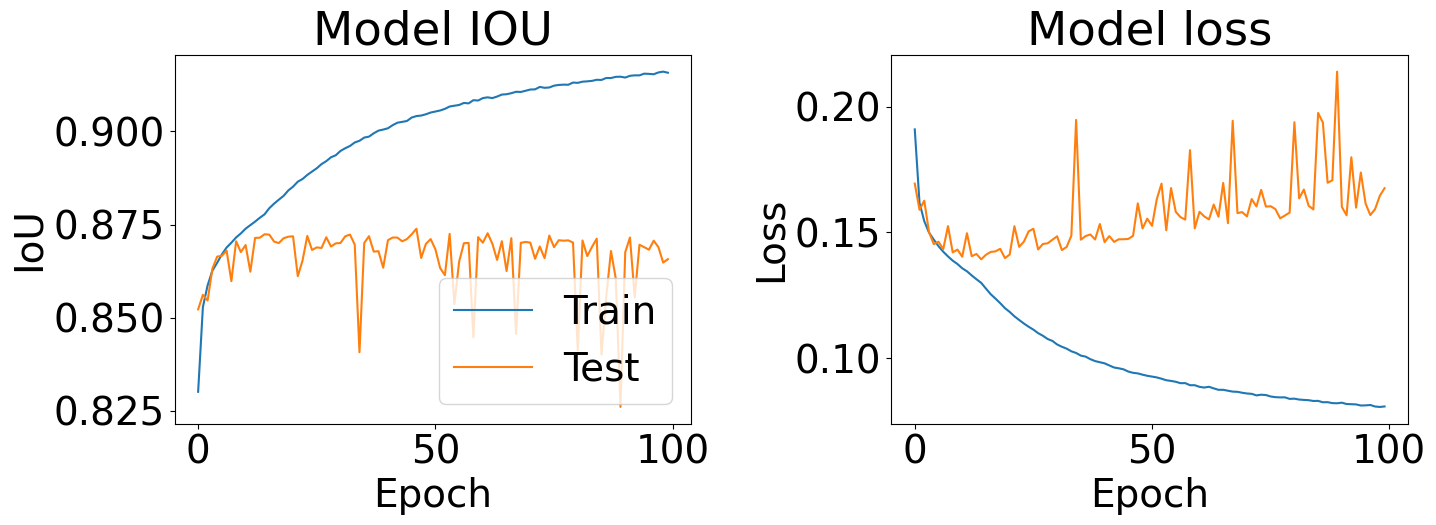

In [7]:
import matplotlib
font = {'family' : 'normal',
        'size'   : 28}

df = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/modis_dnbr_0_five_plus_128_2d_ds_aug.csv")
df = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_dnbr_one_128_2d_ds_proj_pos.csv')
# df = pd.read_csv('/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_dnbr_one_128_2d_ds_long_neg.csv')
#l8_sent_collection2_crop_dnbr_0_two_long_128.csv
#l8_sent_collection2_crop_dnbr_0_two_long_128_neg_aug.csv
matplotlib.rc('font', **font)

#plot the curves
plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.plot(df['IOU'])
plt.plot(df['Val_IOU'])
plt.title("Model IOU")
plt.ylabel('IoU')
plt.xlabel('Epoch')
# plt.ylim(0, 1)
# plt.xlim(40,70)
plt.legend(['Train', 'Test'], loc='lower right')


# Plot training & validation loss values
plt.subplot(222)
plt.plot(df['Loss'])
plt.plot(df['Val_Loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
# plt.ylim(0, 1)
# plt.legend(['Train', 'Test'], loc='upper left')


# plt.subplot(223)
# plt.plot(df['F1'])
# plt.plot(df['Val_F1'])
# plt.title('Model F1')
# plt.ylabel('F1')
# plt.xlabel('Epoch')
# plt.ylim(0, 1)
plt.tight_layout()

# plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# plt.subplot(122)
# plt.plot(df['Loss'])
# plt.plot(df['Val_Loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.ylim(0, 1)
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

Read in all the models

In [16]:
# #-------landsat 8
# landsat_128 = tensorflow.keras.models.load_model("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_128.h5", 
#                                            custom_objects={'precision':sm.metrics.Precision(threshold=0.5), 
#                                                            'recall':sm.metrics.Recall(threshold = 0.5),
#                                                             'f1-score': sm.metrics.FScore(threshold=0.5),
#                                                              'iou_score': sm.metrics.IOUScore(threshold=0.5)})


# landsat_0_128 = tensorflow.keras.models.load_model("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_0_128.h5", 
#                                            custom_objects={'precision':sm.metrics.Precision(threshold=0.5), 
#                                                            'recall':sm.metrics.Recall(threshold = 0.5),
#                                                             'f1-score': sm.metrics.FScore(threshold=0.5),
#                                                              'iou_score': sm.metrics.IOUScore(threshold=0.5)})

# landsat_079_128 = tensorflow.keras.models.load_model("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_079_128.h5", 
#                                            custom_objects={'precision':sm.metrics.Precision(threshold=0.5), 
#                                                            'recall':sm.metrics.Recall(threshold = 0.5),
#                                                             'f1-score': sm.metrics.FScore(threshold=0.5),
#                                                              'iou_score': sm.metrics.IOUScore(threshold=0.5)})


# landsat_256 = tensorflow.keras.models.load_model("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_256.h5", 
#                                            custom_objects={'precision':sm.metrics.Precision(threshold=0.5), 
#                                                            'recall':sm.metrics.Recall(threshold = 0.5),
#                                                             'f1-score': sm.metrics.FScore(threshold=0.5),
#                                                              'iou_score': sm.metrics.IOUScore(threshold=0.5)})


# landsat_0_256 = tensorflow.keras.models.load_model("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_0_256.h5", 
#                                            custom_objects={'precision':sm.metrics.Precision(threshold=0.5), 
#                                                            'recall':sm.metrics.Recall(threshold = 0.5),
#                                                             'f1-score': sm.metrics.FScore(threshold=0.5),
#                                                              'iou_score': sm.metrics.IOUScore(threshold=0.5)})

# landsat_079_256 = tensorflow.keras.models.load_model("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_079_256.h5", 
#                                            custom_objects={'precision':sm.metrics.Precision(threshold=0.5), 
#                                                            'recall':sm.metrics.Recall(threshold = 0.5),
#                                                             'f1-score': sm.metrics.FScore(threshold=0.5),
#                                                              'iou_score': sm.metrics.IOUScore(threshold=0.5)})


# landsat_512 = tensorflow.keras.models.load_model("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_512.h5", 
#                                            custom_objects={'precision':sm.metrics.Precision(threshold=0.5), 
#                                                            'recall':sm.metrics.Recall(threshold = 0.5),
#                                                             'f1-score': sm.metrics.FScore(threshold=0.5),
#                                                              'iou_score': sm.metrics.IOUScore(threshold=0.5)})


# landsat_0_512 = tensorflow.keras.models.load_model("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_0_512.h5", 
#                                            custom_objects={'precision':sm.metrics.Precision(threshold=0.5), 
#                                                            'recall':sm.metrics.Recall(threshold = 0.5),
#                                                             'f1-score': sm.metrics.FScore(threshold=0.5),
#                                                              'iou_score': sm.metrics.IOUScore(threshold=0.5)})

# landsat_079_512 = tensorflow.keras.models.load_model("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_079_512.h5", 
#                                            custom_objects={'precision':sm.metrics.Precision(threshold=0.5), 
#                                                            'recall':sm.metrics.Recall(threshold = 0.5),
#                                                             'f1-score': sm.metrics.FScore(threshold=0.5),
#                                                              'iou_score': sm.metrics.IOUScore(threshold=0.5)})

# # #landsat sentinel 2
# landsat_sent_128 = tensorflow.keras.models.load_model("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_128.h5", 
#                                            custom_objects={'precision':sm.metrics.Precision(threshold=0.5), 
#                                                            'recall':sm.metrics.Recall(threshold = 0.5),
#                                                             'f1-score': sm.metrics.FScore(threshold=0.5),
#                                                              'iou_score': sm.metrics.IOUScore(threshold=0.5)})


# landsat_sent_0_128 = tensorflow.keras.models.load_model("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_0_128.h5", 
#                                            custom_objects={'precision':sm.metrics.Precision(threshold=0.5), 
#                                                            'recall':sm.metrics.Recall(threshold = 0.5),
#                                                             'f1-score': sm.metrics.FScore(threshold=0.5),
#                                                              'iou_score': sm.metrics.IOUScore(threshold=0.5)})

# landsat_sent_079_128 = tensorflow.keras.models.load_model("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_079_128.h5", 
#                                            custom_objects={'precision':sm.metrics.Precision(threshold=0.5), 
#                                                            'recall':sm.metrics.Recall(threshold = 0.5),
#                                                             'f1-score': sm.metrics.FScore(threshold=0.5),
#                                                              'iou_score': sm.metrics.IOUScore(threshold=0.5)})


# landsat_sent_256 = tensorflow.keras.models.load_model("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_256.h5", 
#                                            custom_objects={'precision':sm.metrics.Precision(threshold=0.5), 
#                                                            'recall':sm.metrics.Recall(threshold = 0.5),
#                                                             'f1-score': sm.metrics.FScore(threshold=0.5),
#                                                              'iou_score': sm.metrics.IOUScore(threshold=0.5)})


# landsat_sent_0_256 = tensorflow.keras.models.load_model("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_0_256.h5", 
#                                            custom_objects={'precision':sm.metrics.Precision(threshold=0.5), 
#                                                            'recall':sm.metrics.Recall(threshold = 0.5),
#                                                             'f1-score': sm.metrics.FScore(threshold=0.5),
#                                                              'iou_score': sm.metrics.IOUScore(threshold=0.5)})

# landsat_sent_079_256 = tensorflow.keras.models.load_model("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_079_256.h5", 
#                                            custom_objects={'precision':sm.metrics.Precision(threshold=0.5), 
#                                                            'recall':sm.metrics.Recall(threshold = 0.5),
#                                                             'f1-score': sm.metrics.FScore(threshold=0.5),
#                                                              'iou_score': sm.metrics.IOUScore(threshold=0.5)})



# landsat_079_512 = tensorflow.keras.models.load_model("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_collection2_079_512.h5", 
#                                            custom_objects={'precision':sm.metrics.Precision(threshold=0.5), 
#                                                            'recall':sm.metrics.Recall(threshold = 0.5),
#                                                             'f1-score': sm.metrics.FScore(threshold=0.5),
#                                                              'iou_score': sm.metrics.IOUScore(threshold=0.5)})


# #-------just landsat
# just_landsat_128 = tensorflow.keras.models.load_model("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/just_land_collection2_128.h5", 
#                                            custom_objects={'precision':sm.metrics.Precision(threshold=0.5), 
#                                                            'recall':sm.metrics.Recall(threshold = 0.5),
#                                                             'f1-score': sm.metrics.FScore(threshold=0.5),
#                                                              'iou_score': sm.metrics.IOUScore(threshold=0.5)})


# just_landsat_0_128 = tensorflow.keras.models.load_model("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/just_land_collection2_0_128.tf", 
#                                            custom_objects={'precision':sm.metrics.Precision(threshold=0.5), 
#                                                            'recall':sm.metrics.Recall(threshold = 0.5),
#                                                             'f1-score': sm.metrics.FScore(threshold=0.5),
#                                                              'iou_score': sm.metrics.IOUScore(threshold=0.5)})

# just_landsat_079_128 = tensorflow.keras.models.load_model("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/just_land_collection2_079_128.tf", 
#                                            custom_objects={'precision':sm.metrics.Precision(threshold=0.5), 
#                                                            'recall':sm.metrics.Recall(threshold = 0.5),
#                                                             'f1-score': sm.metrics.FScore(threshold=0.5),
#                                                            'iou_score': sm.metrics.IOUScore(threshold=0.5)})
    




# #--------no landsat 7 
# landst_sent_no_7_128 = tensorflow.keras.models.load_model("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/nbac_land_no7_128.tf", 
#                                            custom_objects={'precision':sm.metrics.Precision(threshold=0.5), 
#                                                            'recall':sm.metrics.Recall(threshold = 0.5),
#                                                             'f1-score': sm.metrics.FScore(threshold=0.5),
#                                                              'iou_score': sm.metrics.IOUScore(threshold=0.5)})


## landst_sent_no_7_0_128 = tensorflow.keras.models.load_model("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/nbac_land_no7_0_128.tf", 
##                                            custom_objects={'precision':sm.metrics.Precision(threshold=0.5), 
##                                                            'recall':sm.metrics.Recall(threshold = 0.5),
##                                                             'f1-score': sm.metrics.FScore(threshold=0.5),
##                                                              'iou_score': sm.metrics.IOUScore(threshold=0.5)})


#-----------all ak ca

# ak_ca_0_128 = tensorflow.keras.models.load_model("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/ak_ca_c2_0_128.tf", 
#                                            custom_objects={'precision':sm.metrics.Precision(threshold=0.5), 
#                                                            'recall':sm.metrics.Recall(threshold = 0.5),
#                                                             'f1-score': sm.metrics.FScore(threshold=0.5),
#                                                              'iou_score': sm.metrics.IOUScore(threshold=0.5)})

# #just 3 ak ca
# ak_ca_0_3_128 = tensorflow.keras.models.load_model("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/ak_ca_c2_0_128_just_3.tf", 
#                                            custom_objects={'precision':sm.metrics.Precision(threshold=0.5), 
#                                                            'recall':sm.metrics.Recall(threshold = 0.5),
#                                                             'f1-score': sm.metrics.FScore(threshold=0.5),
#                                                              'iou_score': sm.metrics.IOUScore(threshold=0.5)})


# #just 6 ak ca
# ak_ca_0_6_128 = tensorflow.keras.models.load_model("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/ak_ca_c2_0_128_just_6.tf", 
#                                            custom_objects={'precision':sm.metrics.Precision(threshold=0.5), 
#                                                            'recall':sm.metrics.Recall(threshold = 0.5),
#                                                             'f1-score': sm.metrics.FScore(threshold=0.5),
#                                                              'iou_score': sm.metrics.IOUScore(threshold=0.5)})

# #--------------global norm
# global_norm_128 = tensorflow.keras.models.load_model("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_0_global_norm.tf", 
#                                            custom_objects={'precision':sm.metrics.Precision(threshold=0.5), 
#                                                            'recall':sm.metrics.Recall(threshold = 0.5),
#                                                             'f1-score': sm.metrics.FScore(threshold=0.5),
#                                                             'iou_score': sm.metrics.IOUScore(threshold=0.5)})

# #-------------just 3 nbac standard
# landsat_sent_0_128_just3_standard = tensorflow.keras.models.load_model("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_0_3_standardize.tf", 
#                                            custom_objects={'precision':sm.metrics.Precision(threshold=0.5), 
#                                                            'recall':sm.metrics.Recall(threshold = 0.5),
#                                                             'f1-score': sm.metrics.FScore(threshold=0.5),
#                                                              'iou_score': sm.metrics.IOUScore(threshold=0.5)})
# landsat_sent_0_128_just3_glob_standard = tensorflow.keras.models.load_model("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_0_3_global_stand.tf", 
#                                            custom_objects={'precision':sm.metrics.Precision(threshold=0.5), 
#                                                            'recall':sm.metrics.Recall(threshold = 0.5),
#                                                             'f1-score': sm.metrics.FScore(threshold=0.5),
#                                                              'iou_score': sm.metrics.IOUScore(threshold=0.5)})

#-----------just dnbr normalize cutoff
landsat_sent_0_256_just1_cutoff= tensorflow.keras.models.load_model("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_0_3_norm_cutoff_dnbr_256.tf", 
                                           custom_objects={'precision':sm.metrics.Precision(threshold=0.5), 
                                                           'recall':sm.metrics.Recall(threshold = 0.5),
                                                            'f1-score': sm.metrics.FScore(threshold=0.5),
                                                             'iou_score': sm.metrics.IOUScore(threshold=0.5)})


landsat_sent_0_256_just1_mm_cutoff= tensorflow.keras.models.load_model("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_0_3_norm_cutoff_dnbr_mm_256.tf", 
                                           custom_objects={'precision':sm.metrics.Precision(threshold=0.5), 
                                                           'recall':sm.metrics.Recall(threshold = 0.5),
                                                            'f1-score': sm.metrics.FScore(threshold=0.5),
                                                             'iou_score': sm.metrics.IOUScore(threshold=0.5)})
#-----------just 3 nbac normalize cutoff
# landsat_sent_0_128_just3_cutoff= tensorflow.keras.models.load_model("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_0_3_norm_cutoff.tf", 
#                                            custom_objects={'precision':sm.metrics.Precision(threshold=0.5), 
#                                                            'recall':sm.metrics.Recall(threshold = 0.5),
#                                                             'f1-score': sm.metrics.FScore(threshold=0.5),
#                                                              'iou_score': sm.metrics.IOUScore(threshold=0.5)})

# landsat_sent_0_512_just3_cutoff= tensorflow.keras.models.load_model("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_0_3_norm_cutoff_512.tf", 
#                                            custom_objects={'precision':sm.metrics.Precision(threshold=0.5), 
#                                                            'recall':sm.metrics.Recall(threshold = 0.5),
#                                                             'f1-score': sm.metrics.FScore(threshold=0.5),
#                                                              'iou_score': sm.metrics.IOUScore(threshold=0.5)})

# #------------direction
# landsat_sent_0_128_just3_direction= tensorflow.keras.models.load_model("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_0_3_direction.tf", 
#                                            custom_objects={'precision':sm.metrics.Precision(threshold=0.5), 
#                                                            'recall':sm.metrics.Recall(threshold = 0.5),
#                                                             'f1-score': sm.metrics.FScore(threshold=0.5),
#                                                              'iou_score': sm.metrics.IOUScore(threshold=0.5)})









# # landsat_thresh = tensorflow.keras.models.load_model("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/15b_adam_9bands_eff7_median_nbac_1985_no_sent2_threshold.h5", 
# #                                            custom_objects={'precision':sm.metrics.Precision(threshold=0.5), 
# #                                                            'recall':sm.metrics.Recall(threshold = 0.5),
# #                                                             'f1-score': sm.metrics.FScore(threshold=0.5),
# #                                                              'iou_score': sm.metrics.IOUScore(threshold=0.5)})

# sent = tensorflow.keras.models.load_model("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/15b_adam_9bands_eff7_median_nbac_1985_harm_sent2.h5", 
#                                            custom_objects={'precision':sm.metrics.Precision(threshold=0.5), 
#                                                            'recall':sm.metrics.Recall(threshold = 0.5),
#                                                             'f1-score': sm.metrics.FScore(threshold=0.5),
#                                                              'iou_score': sm.metrics.IOUScore(threshold=0.5)})

# sent_thresh = tensorflow.keras.models.load_model("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/15b_adam_9bands_eff7_median_nbac_1985_harm_0_sent2.h5", 
#                                            custom_objects={'precision':sm.metrics.Precision(threshold=0.5), 
#                                                            'recall':sm.metrics.Recall(threshold = 0.5),
#                                                             'f1-score': sm.metrics.FScore(threshold=0.5),
#                                                              'iou_score': sm.metrics.IOUScore(threshold=0.5)})


# no_7 = tensorflow.keras.models.load_model("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/no_7.h5", 
#                                            custom_objects={'precision':sm.metrics.Precision(threshold=0.5), 
#                                                            'recall':sm.metrics.Recall(threshold = 0.5),
#                                                             'f1-score': sm.metrics.FScore(threshold=0.5),
#                                                              'iou_score': sm.metrics.IOUScore(threshold=0.5)})

# augmented = tensorflow.keras.models.load_model("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/0_threshold_aug.h5", 
#                                            custom_objects={'precision':sm.metrics.Precision(threshold=0.5), 
#                                                            'recall':sm.metrics.Recall(threshold = 0.5),
#                                                             'f1-score': sm.metrics.FScore(threshold=0.5),
#                                                              'iou_score': sm.metrics.IOUScore(threshold=0.5)})



#modis
# modis = tensorflow.keras.models.load_model("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/moidis.h5", 
#                                            custom_objects={'precision':sm.metrics.Precision(threshold=0.5), 
#                                                            'recall':sm.metrics.Recall(threshold = 0.5),
#                                                             'f1-score': sm.metrics.FScore(threshold=0.5),
#                                                              'iou_score': sm.metrics.IOUScore(threshold=0.5)})

# modis_0 = tensorflow.keras.models.load_model("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/moidis_0.h5", 
#                                            custom_objects={'precision':sm.metrics.Precision(threshold=0.5), 
#                                                            'recall':sm.metrics.Recall(threshold = 0.5),
#                                                             'f1-score': sm.metrics.FScore(threshold=0.5),
#                                                              'iou_score': sm.metrics.IOUScore(threshold=0.5)})

#negative
# negative = tensorflow.keras.models.load_model("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/15b_adam_9bands_eff7_median_nbac_1985_harm_sent2_negative.h5", 
#                                            custom_objects={'precision':sm.metrics.Precision(threshold=0.5), 
#                                                            'recall':sm.metrics.Recall(threshold = 0.5),
#                                                             'f1-score': sm.metrics.FScore(threshold=0.5),
#                                                              'iou_score': sm.metrics.IOUScore(threshold=0.5)})



In [18]:
't'

't'

Get all the testing scores

In [17]:
#landsat 
# land_128_res = landsat_128.evaluate_generator(land_128_testing_gen, 100)
# land_128_0_res = landsat_0_128.evaluate_generator(land_128_0_testing_gen, 100)
# land_128_079_res = landsat_079_128.evaluate_generator(land_128_079_testing_gen, 100)

# land_128_res2 = landsat_128.evaluate_generator(mtbs_testing_gen, 100)
# land_128_0_res2 = landsat_0_128.evaluate_generator(mtbs_0_testing_gen, 100)
# land_128_079_res2 = landsat_079_128.evaluate_generator(mtbs_079_testing_gen, 100)


# land_256_res = landsat_256.evaluate_generator(land_256_testing_gen, 100)
# land_256_0_res = landsat_0_256.evaluate_generator(land_256_0_testing_gen, 100)
# land_256_079_res = landsat_079_256.evaluate_generator(land_256_079_testing_gen, 100)


# land_512_res = landsat_512.evaluate_generator(land_512_testing_gen, 100)
# land_512_0_res = landsat_0_512.evaluate_generator(land_512_0_testing_gen, 100)
# land_512_079_res = landsat_079_512.evaluate_generator(land_512_079_testing_gen, 100)



# #landsat and sentinel
# land_sent_128_res = landsat_sent_128.evaluate_generator(land_sent_128_testing_gen, 100)
# land_sent_128_0_res = landsat_sent_0_128.evaluate_generator(land_sent_128_0_testing_gen, 100)
# land_sent_128_079_res = landsat_sent_079_128.evaluate_generator(land_sent_128_079_testing_gen, 100)

# land_sent_128_res2 = landsat_sent_128.evaluate_generator(mtbs_testing_gen, 100)
# land_sent_128_0_res2 = landsat_sent_0_128.evaluate_generator(mtbs_0_testing_gen, 100)
# land_sent_128_079_res2 = landsat_sent_079_128.evaluate_generator(mtbs_079_testing_gen, 100)


# land_sent_256_res = landsat_sent_256.evaluate_generator(land_sent_256_testing_gen, 100)
# land_sent_256_0_res = landsat_sent_0_256.evaluate_generator(land_sent_256_0_testing_gen, 100)
# land_sent_256_079_res = landsat_sent_079_256.evaluate_generator(land_sent_256_079_testing_gen, 100)


# #-------just landsat
# just_land_128_res = just_landsat_128.evaluate_generator(just_land_128_testing_gen, 100)
# just_land_128_0_res = just_landsat_0_128.evaluate_generator(just_land_128_0_testing_gen, 100)
# just_land_128_079_res = just_landsat_079_128.evaluate_generator(just_land_128_079_testing_gen, 100)

# just_land_128_res2 = just_landsat_128.evaluate_generator(mtbs_testing_gen, 100)
# just_land_128_0_res2 = just_landsat_0_128.evaluate_generator(mtbs_0_testing_gen, 100)
# just_land_128_079_res2 = just_landsat_079_128.evaluate_generator(mtbs_079_testing_gen, 100)



# #--------no landsat 7
# land_sent_no_7_128_res = landst_sent_no_7_128.evaluate_generator(land_sent_no_7_128_testing_gen, 100)
# land_sent_no_7_128_0_res = landst_sent_no_7_0_128.evaluate_generator(land_sent_no_7_128_0_testing_gen, 100)
# # just_land_128_079_res = just_landsat_079_128.evaluate_generator(just_land_128_079_testing_gen, 100)


# land_sent_no_7_128_res2 = landst_sent_no_7_128.evaluate_generator(mtbs_testing_gen, 100)
# land_sent_no_7_128_0_res2 = landst_sent_no_7_128.evaluate_generator(mtbs_079_testing_gen, 100)
# # just_land_128_079_res = just_landsat_079_128.evaluate_generator(just_land_128_079_testing_gen, 100)


# # #-------ak ca
# # ak_ca_128_0_res = ak_ca_0_128.evaluate_generator(ak_ca_128_0_testing_gen, 100)
# ak_ca_128_0_3_res = ak_ca_0_3_128.evaluate_generator(ak_ca_128_3_0_testing_gen, 100)
# ak_ca_128_0_3_res2 = ak_ca_0_3_128.evaluate_generator(mtbs_0_testing_gen_just_3, 100)

# ak_ca_128_0_6_res = ak_ca_0_6_128.evaluate_generator(ak_ca_128_6_0_testing_gen, 100)
# ak_ca_128_0_6_res2 = ak_ca_0_6_128.evaluate_generator(mtbs_0_testing_gen_just_6, 100)


# # #-------global norm
# # global_norm_res = global_norm_128.evaluate_generator(land_sent_128_0_global_testing_gen, 100)

# # global_norm_res2 = global_norm_128.evaluate_generator(mtbs_0_testing_gen_global, 100)

# #--------just 3 nbac standardize
# landsat_sent_0_128_just3_standard_res = landsat_sent_0_128_just3_standard.evaluate_generator(land_sent_128_0_just_3_stand_gen, 100)
# landsat_sent_0_128_just3_standard_res2 = landsat_sent_0_128_just3_standard.evaluate_generator(mtbs_0_testing_gen_just_3_standard, 100)

# landsat_sent_0_128_just3_glob_standard_res = landsat_sent_0_128_just3_glob_standard.evaluate_generator(land_sent_128_0_just_3_stand_gen, 100)
# landsat_sent_0_128_just3_glob_standard_res2 = landsat_sent_0_128_just3_glob_standard.evaluate_generator(mtbs_0_testing_gen_just_3_standard, 100)


# #--------just 3 nbac normalize cutoff
# landsat_sent_0_128_just3_cutoff_res = landsat_sent_0_128_just3_cutoff.evaluate_generator(land_sent_128_0_just_3_cutoff_gen, 100)
# landsat_sent_0_128_just3_cutoff_res2 = landsat_sent_0_128_just3_cutoff.evaluate_generator(mtbs_0_testing_gen_just_3_norm_cutoff, 100)

# landsat_sent_0_512_just3_cutoff_res = landsat_sent_0_512_just3_cutoff.evaluate_generator(land_sent_512_0_just_3_cutoff_gen, 100)
# landsat_sent_0_512_just3_cutoff_res2 = landsat_sent_0_512_just3_cutoff.evaluate_generator(mtbs_512_0_testing_gen_just_3_norm_cutoff, 100)

#-------just dnbr
landsat_sent_0_256_just1_cutoff_res = landsat_sent_0_256_just1_cutoff.evaluate_generator(land_sent_256_0_just_1_cutoff_gen, 100)
landsat_sent_0_256_just1_mm_cutoff_res = landsat_sent_0_256_just1_mm_cutoff.evaluate_generator(land_sent_256_0_just_1_cutoff_gen, 100)

# #--------just 3 nbac direction
# landsat_sent_0_128_just3_direction_res = landsat_sent_0_128_just3_direction.evaluate_generator(land_sent_128_0_just_3_direction_gen, 100)
# landsat_sent_0_128_just3_direction_res2 = landsat_sent_0_128_just3_direction.evaluate_generator(mtbs_0_testing_gen_just_3_direction, 100)



# land_thresh_res = landsat_thresh.evaluate_generator(land_thres_testing_gen, 100)
# sent_res = sent.evaluate_generator(sent_testing_gen, 100)
# sent_thresh_res = sent_thresh.evaluate_generator(sent_thres_testing_gen, 100)
# no_7_res = no_7.evaluate_generator(sent_testing_gen, 100)
# aug_res = augmented.evaluate_generator(sent_thres_testing_gen, 100)
# modis_res = modis.evaluate_generator(modis_testing_gen, 100)
# modis_0_res = modis_0.evaluate_generator(modis_0_testing_gen, 100)

# negative_res = negative.evaluate_generator(negative_testing_gen, 100)



/tmp/ipykernel_3544517/2908545504.py:89: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  landsat_sent_0_256_just1_cutoff_res = landsat_sent_0_256_just1_cutoff.evaluate_generator(land_sent_256_0_just_1_cutoff_gen, 100)
/tmp/ipykernel_3544517/2908545504.py:90: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  landsat_sent_0_256_just1_mm_cutoff_res = landsat_sent_0_256_just1_mm_cutoff.evaluate_generator(land_sent_256_0_just_1_cutoff_gen, 100)


In [18]:
't'

't'

In [19]:
# print(f"Landsat 128 testing IoU is {land_128_res[-1]}")
# print(f"Landsat 128 0 testing IoU is {land_128_0_res[-1]}")
# print(f"Landsat 128 079 testing IoU is {land_128_079_res[-1]}")

# print(f"Landsat 128 testing IoU is {land_128_res[-1]}")
# print(f"Landsat 128 0 testing IoU is {land_128_0_res[-1]}")
# print(f"Landsat 128 079 testing IoU is {land_128_079_res[-1]}")

# print(f"Landsat 128 MTBS testing IoU is {land_128_res2[-1]}")
# print(f"Landsat 128 0 MTBS testing IoU is {land_128_0_res2[-1]}")
# print(f"Landsat 128 079 MTBS testing IoU is {land_128_079_res2[-1]}")

# print(f"Landsat 256 testing IoU is {land_256_res[-1]}")
# print(f"Landsat 256 0 testing IoU is {land_256_0_res[-1]}")
# print(f"Landsat 256 079 testing IoU is {land_256_079_res[-1]}")

# print(f"Landsat 512 testing IoU is {land_512_res[-1]}")
# print(f"Landsat 512 0 testing IoU is {land_512_0_res[-1]}")
# print(f"Landsat 512 079 testing IoU is {land_512_079_res[-1]}")


#landsat and sentinel
# print(f"Landsat Sent 128 testing IoU is {land_sent_128_res[-1]}")
# print(f"Landsat Sent 128 0 testing IoU is {land_sent_128_0_res[-1]}")
# print(f"Landsat Sent 128 079 testing IoU is {land_sent_128_079_res[-1]}")

# print(f"Landsat Sent 128 MTBS testing IoU is {land_sent_128_res2[-1]}")
# print(f"Landsat Sent 128 MTBS 0 testing IoU is {land_sent_128_0_res2[-1]}")
# print(f"Landsat Sent 128 MTBS 079 testing IoU is {land_sent_128_079_res2[-1]}")


# print(f"Landsat Sent 256 testing IoU is {land_sent_256_res[-1]}")
# print(f"Landsat Sent 256 0 testing IoU is {land_sent_256_0_res[-1]}")
# print(f"Landsat Sent 256 079 testing IoU is {land_sent_256_079_res[-1]}")


#just landsat
# print(f"Just Landsat 128 testing IoU is {just_land_128_res[-1]}")
# print(f"Just Landsat 128 0 testing IoU is {just_land_128_0_res[-1]}")
# print(f"Landsat 128 079 testing IoU is {just_land_128_079_res[-1]}")

# print(f"Just Landsat 128 MTBS testing IoU is {just_land_128_res2[-1]}")
# print(f"Just Landsat 128 MTBS 0 testing IoU is {just_land_128_0_res2[-1]}")
# print(f"Just Landsat 128 079 MTBS testing IoU is {just_land_128_079_res2[-1]}")


# #-----no lndsat 7 
# print(f"No 7 128 testing IoU is {land_sent_no_7_128_res[-1]}")
# print(f"No 7 128 0 testing IoU is {land_sent_no_7_128_0_res[-1]}")
# # print(f"Landsat 128 079 testing IoU is {just_land_128_079_res[-1]}")

# int(f"No 7 128 MTBS testing IoU is {round(land_sent_no_7_128_res2[-1], 2)}")
# print(f"No 7 128 0 MTBS testing IoU is {round(land_sent_no_7_128_0_res2[-1], 2)}")
# print(f"Landsat 128 079 testing IoU is {just_land_128_079_res[-1]}")

# #-----ak ca
# print(f"AK CA 0 testing IoU is {ak_ca_128_0_res[-1]}")

# print(f"AK CA 0 3 testing IoU is {round(ak_ca_128_0_3_res[-1], 2)}")
# print(f"AK CA 0 6 testing IoU is {round(ak_ca_128_0_6_res[-1], 2)}")

#------global norm
# print(f"Land-Sent global norm is {global_norm_res[-1]}")
# print(f"Land-Sent MTBS global norm is {round(global_norm_res2[-1], 2)}")

#--------nbac 3 standardize
# print(f"Landsat Sent 128 0 3 standardize testing IoU is {round(landsat_sent_0_128_just3_standard_res[-1], 4)}")
# print(f"Landsat Sent 128 MTBS 0 3 standardize testing IoU is {round(landsat_sent_0_128_just3_standard_res2[-1], 4)}")

# print(f"Landsat Sent 128 0 3 Global standardize testing IoU is {round(landsat_sent_0_128_just3_glob_standard_res[-1], 4)}")
# print(f"Landsat Sent 128 MTBS 0 3 Global standardize testing IoU is {round(landsat_sent_0_128_just3_glob_standard_res2[-1], 4)}")

#-----just dnbr
print(f"Landsat Sent 256 0 dbbr cutoff testing IoU is {round(landsat_sent_0_256_just1_cutoff_res[-1], 4)}")
print(f"Landsat Sent 256 0 dbbr MM cutoff testing IoU is {round(landsat_sent_0_256_just1_mm_cutoff_res[-1], 4)}")

#------nbac 3 cutoff
# print(f"Landsat Sent 128 0 3 cutoff testing IoU is {round(landsat_sent_0_128_just3_cutoff_res[-1], 4)}")
# print(f"Landsat Sent 128 MTBS 0 3 cutoff testing IoU is {round(landsat_sent_0_128_just3_cutoff_res2[-1], 4)}")

# print(f"Landsat Sent 512 0 3 cutoff testing IoU is {round(landsat_sent_0_512_just3_cutoff_res[-1], 4)}")

#----direction
# print(f"Landsat Sent 128 0 3 direction testing IoU is {round(landsat_sent_0_128_just3_direction_res[-1], 4)}")
# print(f"Landsat Sent 128 MTBS 0 3 direction testing IoU is {round(landsat_sent_0_128_just3_direction_res2[-1], 4)}")


# print(f"Landsat-Sentinel Theshold testing IoU is {land_thresh_res[-1]}")
# print(f"No 7 testing IoU is {no_7_res[-1]}")
# print(f"Augmented Theshold testing IoU is {aug_res[-1]}")
# print(f"MODIS 0 testing IoU is {modis_0_res[-2]}")

# print(f"Negative testing IoU is {negative_res[-1]}")



Landsat Sent 256 0 dbbr cutoff testing IoU is 0.8854
Landsat Sent 256 0 dbbr MM cutoff testing IoU is 0.8632


In [45]:
global_norm_res2

[0.12618276476860046,
 0.9471187591552734,
 0.9228655099868774,
 0.9337522387504578,
 0.8771185278892517]

Now get the AK results for both the alfdb and mtbs

In [21]:
alfdb_land =  landsat.evaluate_generator(alfdb_testing_gen, 100)
alfdb_thresh_0_land =  landsat.evaluate_generator(alfdb_thres_0_testing_gen, 100)
alfdb_thresh_084_land =  landsat.evaluate_generator(alfdb_thres_084_testing_gen, 100)

mtbs_sent =  landsat.evaluate_generator(mtbs_testing_gen, 100)
mtbs_thresh_0_sent =  landsat.evaluate_generator(mtbs_thres_0_testing_gen, 100)
mtbs_thresh_084_sent =  landsat.evaluate_generator(mtbs_thres_084_testing_gen, 100)

/home/spotter5/.conda/envs/deeplearning/lib/python3.8/site-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '
/home/spotter5/.conda/envs/deeplearning/lib/python3.8/site-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '
/home/spotter5/.conda/envs/deeplearning/lib/python3.8/site-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '
/home/spotter5/.conda/envs/deeplearning/lib/python3.8/site

In [22]:
print(f"ALFDB IoU is {alfdb_land[-1]}")
print(f"ALFDB Theshold 0 testing IoU is {alfdb_thresh_0_land[-1]}")
print(f"ALFDB Theshold 084 testing IoU is {alfdb_thresh_084_land[-1]}")

print(f"MTBS testing IoU is {mtbs_sent[-1]}")
print(f"MTBS threshold 0 testing IoU is {mtbs_thresh_0_sent[-1]}")
print(f"MTBS threshold 084 testing IoU is {mtbs_thresh_084_sent[-1]}")

ALFDB IoU is 0.7550384998321533
ALFDB Theshold testing IoU is 0.8018231987953186
MTBS testing IoU is 0.8389601707458496
MTBS threshold testing IoU is 0.8620374202728271


In [ ]:
Now use sentinel

In [23]:
alfdb_land =  landsat.evaluate_generator(alfdb_testing_gen, 100)
alfdb_thresh_0_land =  landsat.evaluate_generator(alfdb_thres_0_testing_gen, 100)
alfdb_thresh_084_land =  landsat.evaluate_generator(alfdb_thres_084_testing_gen, 100)

mtbs_sent =  landsat.evaluate_generator(mtbs_testing_gen, 100)
mtbs_thresh_0_sent =  landsat.evaluate_generator(mtbs_thres_0_testing_gen, 100)
mtbs_thresh_084_sent =  landsat.evaluate_generator(mtbs_thres_084_testing_gen, 100)

/home/spotter5/.conda/envs/deeplearning/lib/python3.8/site-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '
/home/spotter5/.conda/envs/deeplearning/lib/python3.8/site-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '
/home/spotter5/.conda/envs/deeplearning/lib/python3.8/site-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '
/home/spotter5/.conda/envs/deeplearning/lib/python3.8/site

In [24]:
print(f"ALFDB IoU is {alfdb_land[-1]}")
print(f"ALFDB Theshold 0 testing IoU is {alfdb_thresh_0_land[-1]}")
print(f"ALFDB Theshold 084 testing IoU is {alfdb_thresh_084_land[-1]}")

print(f"MTBS testing IoU is {mtbs_sent[-1]}")
print(f"MTBS threshold 0 testing IoU is {mtbs_thresh_0_sent[-1]}")
print(f"MTBS threshold 084 testing IoU is {mtbs_thresh_084_sent[-1]}")

ALFDB IoU is 0.7459557056427002
ALFDB Theshold testing IoU is 0.8003273606300354
MTBS testing IoU is 0.830655038356781
MTBS threshold testing IoU is 0.86181640625


Now do landsat threshold model

In [25]:
alfdb_land =  landsat.evaluate_generator(alfdb_testing_gen, 100)
alfdb_thresh_0_land =  landsat.evaluate_generator(alfdb_thres_0_testing_gen, 100)
alfdb_thresh_084_land =  landsat.evaluate_generator(alfdb_thres_084_testing_gen, 100)

mtbs_sent =  landsat.evaluate_generator(mtbs_testing_gen, 100)
mtbs_thresh_0_sent =  landsat.evaluate_generator(mtbs_thres_0_testing_gen, 100)
mtbs_thresh_084_sent =  landsat.evaluate_generator(mtbs_thres_084_testing_gen, 100)

/home/spotter5/.conda/envs/deeplearning/lib/python3.8/site-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '
/home/spotter5/.conda/envs/deeplearning/lib/python3.8/site-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '
/home/spotter5/.conda/envs/deeplearning/lib/python3.8/site-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '
/home/spotter5/.conda/envs/deeplearning/lib/python3.8/site

In [26]:
print(f"ALFDB IoU is {alfdb_land[-1]}")
print(f"ALFDB Theshold 0 testing IoU is {alfdb_thresh_0_land[-1]}")
print(f"ALFDB Theshold 084 testing IoU is {alfdb_thresh_084_land[-1]}")

print(f"MTBS testing IoU is {mtbs_sent[-1]}")
print(f"MTBS threshold 0 testing IoU is {mtbs_thresh_0_sent[-1]}")
print(f"MTBS threshold 084 testing IoU is {mtbs_thresh_084_sent[-1]}")

ALFDB IoU is 0.7350780367851257
ALFDB Theshold testing IoU is 0.8254637122154236
MTBS testing IoU is 0.8145474195480347
MTBS threshold testing IoU is 0.8921269178390503


Now sentinel threshold

In [27]:
alfdb_land =  landsat.evaluate_generator(alfdb_testing_gen, 100)
alfdb_thresh_0_land =  landsat.evaluate_generator(alfdb_thres_0_testing_gen, 100)
alfdb_thresh_084_land =  landsat.evaluate_generator(alfdb_thres_084_testing_gen, 100)

mtbs_sent =  landsat.evaluate_generator(mtbs_testing_gen, 100)
mtbs_thresh_0_sent =  landsat.evaluate_generator(mtbs_thres_0_testing_gen, 100)
mtbs_thresh_084_sent =  landsat.evaluate_generator(mtbs_thres_084_testing_gen, 100)

/home/spotter5/.conda/envs/deeplearning/lib/python3.8/site-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '
/home/spotter5/.conda/envs/deeplearning/lib/python3.8/site-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '
/home/spotter5/.conda/envs/deeplearning/lib/python3.8/site-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '
/home/spotter5/.conda/envs/deeplearning/lib/python3.8/site

In [28]:
print(f"ALFDB IoU is {alfdb_land[-1]}")
print(f"ALFDB Theshold 0 testing IoU is {alfdb_thresh_0_land[-1]}")
print(f"ALFDB Theshold 084 testing IoU is {alfdb_thresh_084_land[-1]}")

print(f"MTBS testing IoU is {mtbs_sent[-1]}")
print(f"MTBS threshold 0 testing IoU is {mtbs_thresh_0_sent[-1]}")
print(f"MTBS threshold 084 testing IoU is {mtbs_thresh_084_sent[-1]}")

ALFDB IoU is 0.736589252948761
ALFDB Theshold testing IoU is 0.8305718302726746
MTBS testing IoU is 0.8149294257164001
MTBS threshold testing IoU is 0.895394504070282


Now no landsat 7

In [23]:
# alfdb_land =  no_7.evaluate_generator(alfdb_testing_gen, 100)
# alfdb_thresh_0_land =  no_7.evaluate_generator(alfdb_thres_0_testing_gen, 100)
# alfdb_thresh_084_land = no_7.evaluate_generator(alfdb_thres_840_testing_gen, 100)

mtbs_sent =  no_7.evaluate_generator(mtbs_testing_gen, 100)
mtbs_thresh_0_sent =  no_7.evaluate_generator(mtbs_thres_0_testing_gen, 100)
# mtbs_thresh_084_sent =  no_7.evaluate_generator(mtbs_thres_840_testing_gen, 100)

/home/spotter5/.conda/envs/deeplearning/lib/python3.8/site-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '
/home/spotter5/.conda/envs/deeplearning/lib/python3.8/site-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [24]:
print(f"ALFDB IoU is {alfdb_land[-1]}")
print(f"ALFDB Theshold 0 testing IoU is {alfdb_thresh_0_land[-1]}")
# print(f"ALFDB Theshold 084 testing IoU is {alfdb_thresh_084_land[-1]}")

print(f"MTBS testing IoU is {mtbs_sent[-1]}")
print(f"MTBS threshold 0 testing IoU is {mtbs_thresh_0_sent[-1]}")
# print(f"MTBS threshold 084 testing IoU is {mtbs_thresh_084_sent[-1]}")

ALFDB IoU is 0.753470778465271
ALFDB Theshold 0 testing IoU is 0.7630757093429565
MTBS testing IoU is 0.841338574886322
MTBS threshold 0 testing IoU is 0.8250018954277039


Now augmented Sentinel+ Landsat 0 threshold

In [25]:
alfdb_land =  augmented.evaluate_generator(alfdb_testing_gen, 100)
alfdb_thresh_0_land =   augmented.evaluate_generator(alfdb_thres_0_testing_gen, 100)
# alfdb_thresh_084_land =  augmented.evaluate_generator(alfdb_thres_084_testing_gen, 100)

mtbs_sent =  augmented.evaluate_generator(mtbs_testing_gen, 100)
mtbs_thresh_0_sent =   augmented.evaluate_generator(mtbs_thres_0_testing_gen, 100)
# mtbs_thresh_084_sent =   augmented.evaluate_generator(mtbs_thres_084_testing_gen, 100)

/home/spotter5/.conda/envs/deeplearning/lib/python3.8/site-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '
/home/spotter5/.conda/envs/deeplearning/lib/python3.8/site-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '
/home/spotter5/.conda/envs/deeplearning/lib/python3.8/site-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '
/home/spotter5/.conda/envs/deeplearning/lib/python3.8/site

In [26]:
print(f"ALFDB IoU is {alfdb_land[-1]}")
print(f"ALFDB Theshold 0 testing IoU is {alfdb_thresh_0_land[-1]}")
# print(f"ALFDB Theshold 084 testing IoU is {alfdb_thresh_084_land[-1]}")

print(f"MTBS testing IoU is {mtbs_sent[-1]}")
print(f"MTBS threshold 0 testing IoU is {mtbs_thresh_0_sent[-1]}")
# print(f"MTBS threshold 084 testing IoU is {mtbs_thresh_084_sent[-1]}")

ALFDB IoU is 0.6977648138999939
ALFDB Theshold 0 testing IoU is 0.8450214862823486
MTBS testing IoU is 0.7770437002182007
MTBS threshold 0 testing IoU is 0.9084235429763794


In [4]:

modis_0 = pd.read_csv("/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/modis_0.csv")
# modis_0.head()
modis_0_max = modis_0[modis_0['Val_IOU'] == modis_0['Val_IOU'].max()]['Val_IOU'].values
print(f"MODIS 0  IoU is {modis_0_max}")

MODIS 0  IoU is [0.77095348]


In [5]:
modis_0_max = modis_0[modis_0['Val_Accuracy'] == modis_0['Val_Accuracy'].max()]['Val_Accuracy'].values
print(f"MODIS 0  Accuracy is {modis_0_max}")

MODIS 0  Accuracy is [0.99950033]


In [3]:
import matplotlib
font = {'family' : 'normal',
        'size'   : 28}

df = modis_0
matplotlib.rc('font', **font)

#plot the curves
plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.plot(df['Accuracy'])
plt.plot(df['Val_Accuracy'])
plt.title("Model Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
# plt.ylim(0, 1)
# plt.xlim(40,70)
plt.legend(['Train', 'Test'], loc='lower right')


# Plot training & validation loss values
plt.subplot(222)
plt.plot(df['Loss'])
plt.plot(df['Val_Loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
# plt.ylim(0, 1)
# plt.legend(['Train', 'Test'], loc='upper left')


# plt.subplot(223)
# plt.plot(df['F1'])
# plt.plot(df['Val_F1'])
# plt.title('Model F1')
# plt.ylabel('F1')
# plt.xlabel('Epoch')
# plt.ylim(0, 1)
plt.tight_layout()

# plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

NameError: name 'modis_0' is not defined